# EDA - Data Preprocessing - Feature Engineering

## Libraries


In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8') 


## Load data

In [3]:
print(os.listdir("./gaitrec_data"))

['unbalanced_train_set_metadata.csv', 'groups_sessions_data_test', '.DS_Store', 'postprocessed_train', 'groups_sessions_data_train', 'data_import.ipynb', 'GRF_F_AP_PRO_data_test', 'groups_data_train', 'balanced_train_set_metadata.csv', 'test_set_metadata.csv', 'GRF_F_AP_PRO_data_train', 'postprocessed', 'test_set', 'HC_GRF_F_AP_PRO_train', 'raw', 'GRF_metadata.csv']


In [4]:
DATA_ROOT = "./gaitrec_data/"
GRF_METADATA_PATH = os.path.join(DATA_ROOT, "GRF_metadata.csv")
POSTPROCESSED_DATA_FOLDER = os.path.join(DATA_ROOT, 'postprocessed')

In [5]:
# Annotations and Metadata
GRF_Annotation = pd.read_csv(GRF_METADATA_PATH)

In [6]:
# POSTPROCDSSED DATA

# Left lower extremity
GRF_F_V_PRO_left = pd.read_csv(os.path.join(POSTPROCESSED_DATA_FOLDER, 'GRF_F_V_PRO_left.csv'))
GRF_F_AP_PRO_left = pd.read_csv(os.path.join(POSTPROCESSED_DATA_FOLDER, 'GRF_F_AP_PRO_left.csv'))
GRF_F_ML_PRO_left = pd.read_csv(os.path.join(POSTPROCESSED_DATA_FOLDER, 'GRF_F_ML_PRO_left.csv'))
GRF_COP_AP_PRO_left = pd.read_csv(os.path.join(POSTPROCESSED_DATA_FOLDER, 'GRF_COP_AP_PRO_left.csv'))
GRF_COP_ML_PRO_left = pd.read_csv(os.path.join(POSTPROCESSED_DATA_FOLDER, 'GRF_COP_ML_PRO_left.csv'))

# Right lower extremity
GRF_F_V_PRO_right = pd.read_csv(os.path.join(POSTPROCESSED_DATA_FOLDER, 'GRF_F_V_PRO_right.csv'))
GRF_F_AP_PRO_right = pd.read_csv(os.path.join(POSTPROCESSED_DATA_FOLDER, 'GRF_F_AP_PRO_right.csv'))
GRF_F_ML_PRO_right = pd.read_csv(os.path.join(POSTPROCESSED_DATA_FOLDER, 'GRF_F_ML_PRO_right.csv'))
GRF_COP_AP_PRO_right = pd.read_csv(os.path.join(POSTPROCESSED_DATA_FOLDER, 'GRF_COP_AP_PRO_right.csv'))
GRF_COP_ML_PRO_right = pd.read_csv(os.path.join(POSTPROCESSED_DATA_FOLDER, 'GRF_COP_ML_PRO_right.csv'))


## Metadata file

In [7]:
# Annotations and Metadata
GRF_Annotation = pd.read_csv(GRF_METADATA_PATH)

In [30]:
GRF_Annotation

SUBJECT_ID  SESSION_ID CLASS_LABEL CLASS_LABEL_DETAILED  SEX  AGE  \
0              1       29885          HC                   HC    1   18   
1              1       29886          HC                   HC    1   18   
2              1       29888          HC                   HC    1   18   
3              2   888812549          HC                   HC    1   51   
4              2   888812550          HC                   HC    1   51   
...          ...         ...         ...                  ...  ...  ...   
8966        2392       15483           A                  A_L    1   46   
8967        2392       15484           A                  A_L    1   46   
8968        2392       15541           A                  A_L    1   46   
8969        2392       15603           A                  A_L    1   46   
8970        2392       15666           A                  A_L    1   46   

      HEIGHT  BODY_WEIGHT  BODY_MASS  SHOE_SIZE  AFFECTED_SIDE  \
0      173.0        516.1       52.6       42.0            NaN   
1      173.0        516.2       52.6       42.0            NaN   
2      173.0        516.1       52.6       42.0            NaN   
3      182.0        752.1       76.7       44.0            NaN   
4      182.0        752.4       76.7       44.0            NaN   
...      ...          ...        ...        ...            ...   
8966     NaN       1031.9      105.2        NaN            0.0   
8967     NaN       1031.6      105.2        NaN            0.0   
8968     NaN       1045.5      106.6        NaN            0.0   
8969     NaN       1043.7      106.4        NaN            0.0   
8970     NaN       1051.5      107.2        NaN            0.0   

      SHOD_CONDITION  ORTHOPEDIC_INSOLE  SPEED  READMISSION  SESSION_TYPE  \
0                  1                0.0      2            0             1   
1                  1                0.0      1            0             1   
2                  1                0.0      3            0             1   
3                  1                0.0      1            0             1   
4                  1                0.0      3            0             1   
...              ...                ...    ...          ...           ...   
8966               1                1.0      2            0             2   
8967               1                0.0      2            0             2   
8968               1                1.0      2            0             2   
8969               1                1.0      2            0             2   
8970               1                1.0      2            0             2   

     SESSION_DATE  TRAIN  TRAIN_BALANCED  TEST  
0      29.01.2015      0               0     1  
1      29.01.2015      0               0     1  
2      29.01.2015      0               0     1  
3      03.08.2017      1               0     0  
4      03.08.2017      1               0     0  
...           ...    ...             ...   ...  
8966   18.01.2011      0               0     1  
8967   18.01.2011      0               0     1  
8968   25.01.2011      0               0     1  
8969   02.02.2011      0               0     1  
8970   08.02.2011      0               0     1  

[8971 rows x 20 columns]

In [8]:
# metadata shape 
GRF_Annotation.shape

(8971, 20)

In [10]:
# metadata columns
GRF_Annotation.columns

Index(['SUBJECT_ID', 'SESSION_ID', 'CLASS_LABEL', 'CLASS_LABEL_DETAILED',
       'SEX', 'AGE', 'HEIGHT', 'BODY_WEIGHT', 'BODY_MASS', 'SHOE_SIZE',
       'AFFECTED_SIDE', 'SHOD_CONDITION', 'ORTHOPEDIC_INSOLE', 'SPEED',
       'READMISSION', 'SESSION_TYPE', 'SESSION_DATE', 'TRAIN',
       'TRAIN_BALANCED', 'TEST'],
      dtype='object')

In [14]:
# null values
GRF_Annotation.isnull().sum()

SUBJECT_ID                 0
SESSION_ID                 0
CLASS_LABEL                0
CLASS_LABEL_DETAILED       0
SEX                        0
AGE                        0
HEIGHT                  3251
BODY_WEIGHT                0
BODY_MASS                  0
SHOE_SIZE               3294
AFFECTED_SIDE            810
SHOD_CONDITION             0
ORTHOPEDIC_INSOLE        658
SPEED                      0
READMISSION                0
SESSION_TYPE               0
SESSION_DATE               0
TRAIN                      0
TRAIN_BALANCED             0
TEST                       0
dtype: int64

## Train - Test Split 

In [9]:
# columns: TRAIN, TRAIN_BALANCED, TEST
columns = ['TRAIN', 'TRAIN_BALANCED', 'TEST']

# Extract unique combinations from the columns
combinations = GRF_Annotation[columns].drop_duplicates()

# Print the combinations
print(combinations)

   TRAIN  TRAIN_BALANCED  TEST
0      0               0     1
3      1               0     0
5      1               1     0


### Test set (metadata)

- Is part (=1) or is not part (=0) of TEST.
- A value of 1 indicates that the sample is included in the TEST set, while a value of 0 means it is not included.

In [10]:
# number of samples in the test set (class 1: 2708)
GRF_Annotation['TEST'].value_counts()

TEST
0    6263
1    2708
Name: count, dtype: int64

In [11]:
# Create the test set from metadata 
test_set_metadata = GRF_Annotation[GRF_Annotation['TEST']==1]

In [34]:
test_set_metadata

SUBJECT_ID  SESSION_ID CLASS_LABEL CLASS_LABEL_DETAILED  SEX  AGE  \
0              1       29885          HC                   HC    1   18   
1              1       29886          HC                   HC    1   18   
2              1       29888          HC                   HC    1   18   
24             6       19407          HC                   HC    0   51   
25             6       19409          HC                   HC    0   51   
...          ...         ...         ...                  ...  ...  ...   
8966        2392       15483           A                  A_L    1   46   
8967        2392       15484           A                  A_L    1   46   
8968        2392       15541           A                  A_L    1   46   
8969        2392       15603           A                  A_L    1   46   
8970        2392       15666           A                  A_L    1   46   

      HEIGHT  BODY_WEIGHT  BODY_MASS  SHOE_SIZE  AFFECTED_SIDE  \
0      173.0        516.1       52.6       42.0            NaN   
1      173.0        516.2       52.6       42.0            NaN   
2      173.0        516.1       52.6       42.0            NaN   
24     171.0        786.4       80.2       39.0            NaN   
25     171.0        786.4       80.2       39.0            NaN   
...      ...          ...        ...        ...            ...   
8966     NaN       1031.9      105.2        NaN            0.0   
8967     NaN       1031.6      105.2        NaN            0.0   
8968     NaN       1045.5      106.6        NaN            0.0   
8969     NaN       1043.7      106.4        NaN            0.0   
8970     NaN       1051.5      107.2        NaN            0.0   

      SHOD_CONDITION  ORTHOPEDIC_INSOLE  SPEED  READMISSION  SESSION_TYPE  \
0                  1                0.0      2            0             1   
1                  1                0.0      1            0             1   
2                  1                0.0      3            0             1   
24                 1                0.0      2            0             1   
25                 1                0.0      3            0             1   
...              ...                ...    ...          ...           ...   
8966               1                1.0      2            0             2   
8967               1                0.0      2            0             2   
8968               1                1.0      2            0             2   
8969               1                1.0      2            0             2   
8970               1                1.0      2            0             2   

     SESSION_DATE  TRAIN  TRAIN_BALANCED  TEST  
0      29.01.2015      0               0     1  
1      29.01.2015      0               0     1  
2      29.01.2015      0               0     1  
24     19.04.2012      0               0     1  
25     19.04.2012      0               0     1  
...           ...    ...             ...   ...  
8966   18.01.2011      0               0     1  
8967   18.01.2011      0               0     1  
8968   25.01.2011      0               0     1  
8969   02.02.2011      0               0     1  
8970   08.02.2011      0               0     1  

[2708 rows x 20 columns]

In [12]:
# Save metadata test set to CSV
test_set_metadata.to_csv(os.path.join(DATA_ROOT, "test_set_metadata.csv"), index=False)

### Unbalanced training set (metadata)

In [13]:
# Train - Test instances
GRF_Annotation['TRAIN'].value_counts()

TRAIN
1    6263
0    2708
Name: count, dtype: int64

In [14]:
# Create the unbalanced train set from metadata
unbalanced_train_set_metadata = GRF_Annotation[GRF_Annotation['TRAIN']==1]

In [46]:
unbalanced_train_set_metadata

SUBJECT_ID  SESSION_ID CLASS_LABEL CLASS_LABEL_DETAILED  SEX  AGE  \
3              2   888812549          HC                   HC    1   51   
4              2   888812550          HC                   HC    1   51   
5              2   888812548          HC                   HC    1   51   
6              3       19709          HC                   HC    1   26   
7              3       19710          HC                   HC    1   26   
...          ...         ...         ...                  ...  ...  ...   
8958        2390       15451           A                  A_F    1   47   
8959        2391       15442           A                  A_L    1   55   
8960        2391       15501           A                  A_L    1   55   
8961        2391       15622           A                  A_L    1   56   
8962        2391       15703           A                  A_L    1   56   

      HEIGHT  BODY_WEIGHT  BODY_MASS  SHOE_SIZE  AFFECTED_SIDE  \
3      182.0        752.1       76.7       44.0            NaN   
4      182.0        752.4       76.7       44.0            NaN   
5      182.0        751.9       76.6       44.0            NaN   
6      183.0        689.2       70.3       42.0            NaN   
7      183.0        689.2       70.3       42.0            NaN   
...      ...          ...        ...        ...            ...   
8958     NaN       1079.5      110.0        NaN            1.0   
8959     NaN        861.2       87.8        NaN            0.0   
8960     NaN        864.0       88.1        NaN            0.0   
8961     NaN        870.9       88.8        NaN            0.0   
8962     NaN        871.2       88.8        NaN            0.0   

      SHOD_CONDITION  ORTHOPEDIC_INSOLE  SPEED  READMISSION  SESSION_TYPE  \
3                  1                0.0      1            0             1   
4                  1                0.0      3            0             1   
5                  1                0.0      2            0             1   
6                  0                0.0      2            0             1   
7                  0                0.0      3            0             1   
...              ...                ...    ...          ...           ...   
8958               1                0.0      2            0             2   
8959               1                0.0      2            0             1   
8960               1                0.0      2            0             2   
8961               1                0.0      2            0             2   
8962               1                0.0      2            0             2   

     SESSION_DATE  TRAIN  TRAIN_BALANCED  TEST  
3      03.08.2017      1               0     0  
4      03.08.2017      1               0     0  
5      03.08.2017      1               1     0  
6      03.05.2012      1               0     0  
7      03.05.2012      1               0     0  
...           ...    ...             ...   ...  
8958   13.01.2011      1               0     0  
8959   13.01.2011      1               1     0  
8960   20.01.2011      1               0     0  
8961   03.02.2011      1               0     0  
8962   10.02.2011      1               0     0  

[6263 rows x 20 columns]

In [55]:
# Save metadata unbalanced train set to CSV
unbalanced_train_set_metadata.to_csv(os.path.join(DATA_ROOT, "unbalanced_train_set_metadata.csv"), index=False)

In [15]:
# Load the metadata unbalanced training set 
unbalanced_train_set_metadata = pd.read_csv(os.path.join(DATA_ROOT, 'unbalanced_train_set_metadata.csv'))

### Balanced training set (metadata)

In [16]:
# Train - Test instances
GRF_Annotation['TRAIN_BALANCED'].value_counts()

TRAIN_BALANCED
0    8246
1     725
Name: count, dtype: int64

In [17]:
# Create the unbalanced train set from metadata
balanced_train_set_metadata = GRF_Annotation[GRF_Annotation['TRAIN_BALANCED']==1]

In [50]:
balanced_train_set_metadata

SUBJECT_ID  SESSION_ID CLASS_LABEL CLASS_LABEL_DETAILED  SEX  AGE  \
5              2   888812548          HC                   HC    1   51   
9              3       19712          HC                   HC    1   26   
15             4       19572          HC                   HC    0   28   
18             5       19861          HC                   HC    0   40   
33             8       29874          HC                   HC    1   17   
...          ...         ...         ...                  ...  ...  ...   
8855        2366       25782           A                  A_F    1   42   
8868        2369       41185           A                 A_FR    1   40   
8894        2375       11765           A                  A_F    1   41   
8926        2385       15214           A                  A_F    1   29   
8959        2391       15442           A                  A_L    1   55   

      HEIGHT  BODY_WEIGHT  BODY_MASS  SHOE_SIZE  AFFECTED_SIDE  \
5      182.0        751.9       76.6       44.0            NaN   
9      183.0        693.1       70.7       42.0            NaN   
15     175.0        553.2       56.4       39.0            NaN   
18     170.0        613.6       62.5       38.0            NaN   
33     192.0        758.2       77.3       45.0            NaN   
...      ...          ...        ...        ...            ...   
8855   176.0        715.5       72.9       43.0            0.0   
8868   168.0       1094.1      111.5       42.0            0.0   
8894     NaN       1001.6      102.1        NaN            0.0   
8926     NaN        863.8       88.1        NaN            0.0   
8959     NaN        861.2       87.8        NaN            0.0   

      SHOD_CONDITION  ORTHOPEDIC_INSOLE  SPEED  READMISSION  SESSION_TYPE  \
5                  1                0.0      2            0             1   
9                  1                0.0      2            0             1   
15                 1                0.0      2            0             1   
18                 1                0.0      2            0             1   
33                 1                0.0      2            0             1   
...              ...                ...    ...          ...           ...   
8855               1                0.0      2            0             1   
8868               1                0.0      2            0             1   
8894               1                0.0      2            0             1   
8926               1                0.0      2            0             1   
8959               1                0.0      2            0             1   

     SESSION_DATE  TRAIN  TRAIN_BALANCED  TEST  
5      03.08.2017      1               1     0  
9      03.05.2012      1               1     0  
15     25.04.2012      1               1     0  
18     10.05.2012      1               1     0  
33     29.01.2015      1               1     0  
...           ...    ...             ...   ...  
8855   03.01.2014      1               1     0  
8868   13.12.2017      1               1     0  
8894   15.12.2009      1               1     0  
8926   14.12.2010      1               1     0  
8959   13.01.2011      1               1     0  

[725 rows x 20 columns]

In [56]:
# Save metadata balanced train set to CSV
balanced_train_set_metadata.to_csv(os.path.join(DATA_ROOT, "balanced_train_set_metadata.csv"), index=False)

## Número de pacientes por grupo o clase

Labels:

- CLASS_LABEL: Annotated class labels
- CLASS_LABEL_DETAILED: Annotated class labels for subclasses

In [18]:
# Unique patients unbalanced train set (metadata)
unbalanced_train_set_metadata['SUBJECT_ID'].nunique()

1625

In [19]:
# Count the number of unique patients for each disease group
unique_pat_per_class = unbalanced_train_set_metadata.groupby('CLASS_LABEL')['SUBJECT_ID'].nunique()
unique_pat_per_class.sort_values(ascending=False)

CLASS_LABEL
A     455
K     433
C     300
H     288
HC    149
Name: SUBJECT_ID, dtype: int64

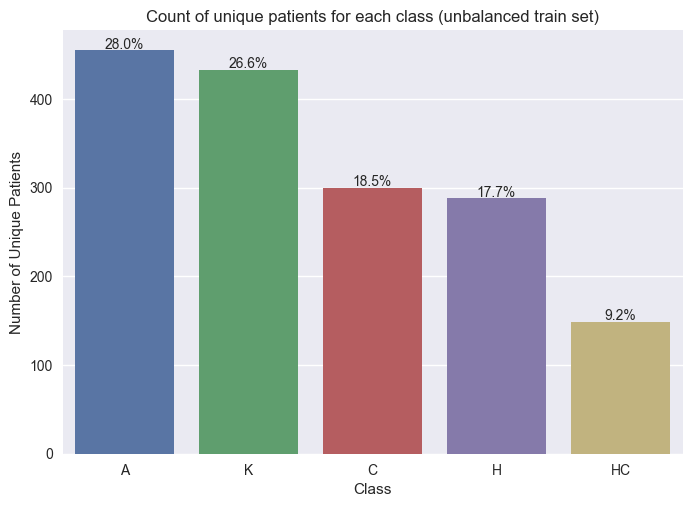

In [20]:
# Calculate the percentage of each disease group
total_patients = unique_pat_per_class.sum()
percentage = (unique_pat_per_class / total_patients) * 100

# Sort the data in descending order
sorted_data = unique_pat_per_class.sort_values(ascending=False)
sorted_percentage = percentage.reindex(sorted_data.index)

# Plotting the count of unique patients for each disease group with percentage
ax = sns.barplot(x=sorted_data.index, y=sorted_data.values)
plt.xlabel('Class')
plt.ylabel('Number of Unique Patients')
plt.title('Count of unique patients for each class (unbalanced train set)')

# Add percentage labels to the plot
for i, count in enumerate(sorted_data.values):
    ax.text(i, count + 2, f'{sorted_percentage[i]:.1f}%', ha='center')

plt.show()

In [22]:
# Count the number of patients for each disease group (detailed)
unique_pat_per_class_detailed = unbalanced_train_set_metadata.groupby('CLASS_LABEL_DETAILED')['SUBJECT_ID'].nunique()
unique_pat_per_class_detailed.sort_values(ascending=False)

CLASS_LABEL_DETAILED
C_F      298
A_F      250
K_F      195
HC       149
H_F      121
K_R      106
A_L       97
H_C       88
K_P       51
K_FR      49
A_FR      39
A_FL      32
H_P       30
H_PC      29
A_R       16
A_O       15
K_PF      11
H_PF      10
K_O        9
K_PR       9
H_CF       7
A_FRL      4
K_PFR      3
H_PCF      3
C_A        2
A_RL       2
a_f        1
Name: SUBJECT_ID, dtype: int64

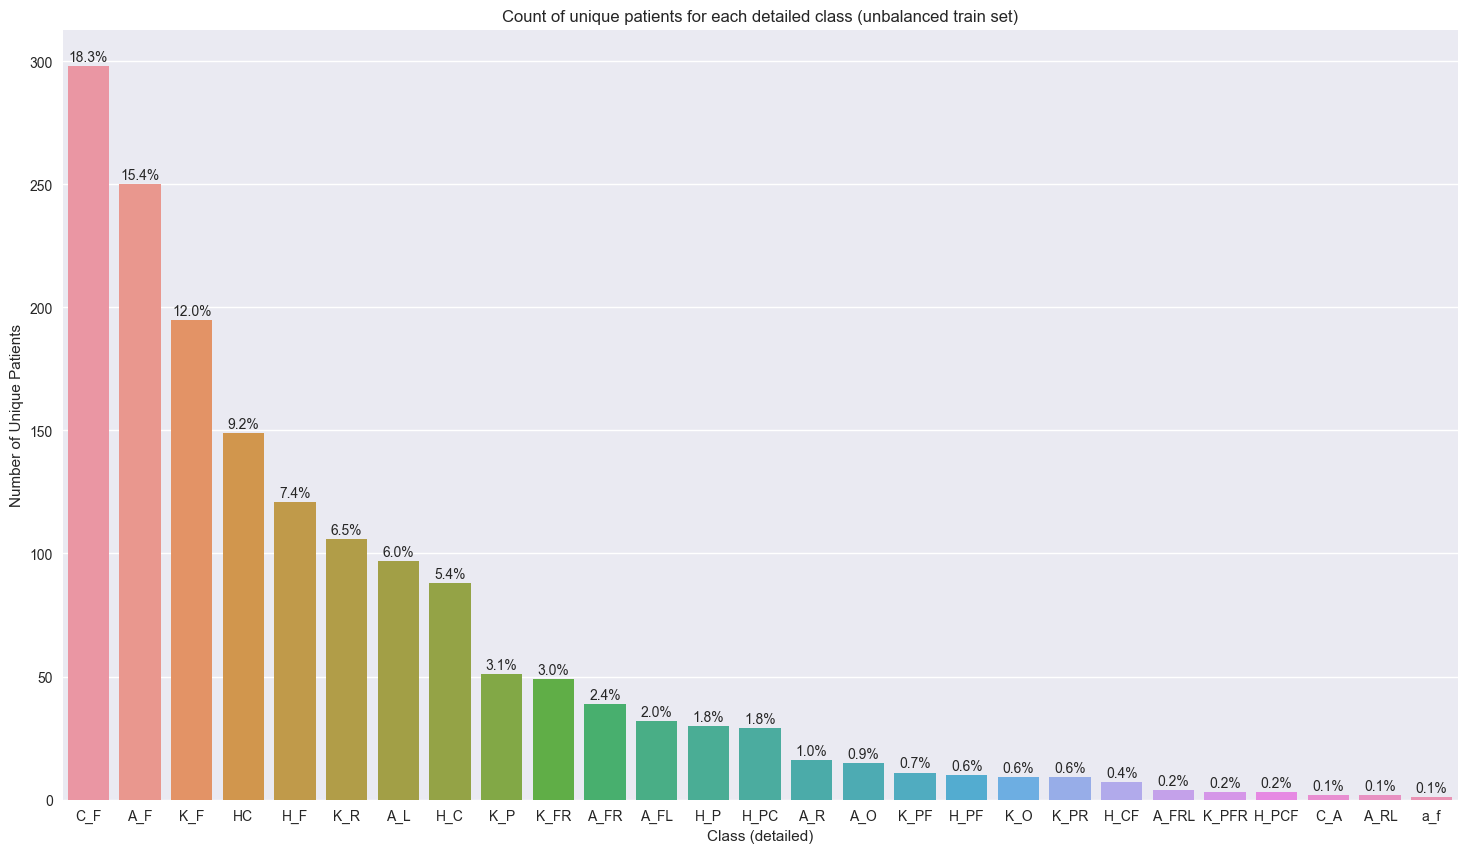

In [23]:
# Calculate the percentage of each disease group
total_patients_detailed = unique_pat_per_class_detailed.sum()
percentage_detailed = (unique_pat_per_class_detailed / total_patients_detailed) * 100

# Sort the data in descending order
sorted_data_d = unique_pat_per_class_detailed.sort_values(ascending=False)
sorted_percentage_d = percentage_detailed.reindex(sorted_data_d.index)

# Plotting the count of unique patients for each disease group with percentage
fig, ax = plt.subplots(figsize=(18, 10))
ax = sns.barplot(x=sorted_data_d.index, y=sorted_data_d.values)
plt.xlabel('Class (detailed)')
plt.ylabel('Number of Unique Patients')
plt.title('Count of unique patients for each detailed class (unbalanced train set)')

# Add percentage labels to the plot
for i, count in enumerate(sorted_data_d.values):
    ax.text(i, count + 2, f'{sorted_percentage_d[i]:.1f}%', ha='center')

plt.show()

## Comprobar si hay diferentes sesiones por paciente

- Comprobar que de un mismo individuo tengamos diferentes sesiones.

SUBJECT_ID
- Unique identifier of a subject

SESSION_ID
- Unique identifier of a session


¿Para cada paciente (SUBJECT_ID) hay varias sesiones (SESSION_ID)?

In [24]:
# Count the number of sessions (SESSION_ID) for each patient in each CLASS_LABEL
session_counts = unbalanced_train_set_metadata.groupby(['SUBJECT_ID', 'CLASS_LABEL'])['SESSION_ID'].count()
print(f"Count of unique trials for each patient: \n{session_counts}")

Count of unique trials for each patient: 
SUBJECT_ID  CLASS_LABEL
2           HC             3
3           HC             6
4           HC             6
5           HC             6
8           HC             3
                          ..
2385        A              6
2388        A              2
2389        A              5
2390        A              4
2391        A              4
Name: SESSION_ID, Length: 1625, dtype: int64


In [25]:
# Comprobamos que de un mismo individuo tengamos diferentes sesiones
all_patients_have_multiple_trials = (session_counts > 1).all()

# Check if all patients have several sessions
if all_patients_have_multiple_trials:
    print("All patients have several sessions.")
else:
    print("Not all patients have several sessions.")

Not all patients have several sessions.


In [26]:
# Patients that do not have several sessions
session_counts[session_counts <= 1].value_counts()

SESSION_ID
1    165
Name: count, dtype: int64

- 165 pacientes tienen 1 solo sesión.
- Los otros tienen más de 1 sesión.  

In [27]:
unbalanced_train_set_metadata.groupby(['SUBJECT_ID', 'CLASS_LABEL'])['SESSION_ID'].count()

SUBJECT_ID  CLASS_LABEL
2           HC             3
3           HC             6
4           HC             6
5           HC             6
8           HC             3
                          ..
2385        A              6
2388        A              2
2389        A              5
2390        A              4
2391        A              4
Name: SESSION_ID, Length: 1625, dtype: int64

## Creating the TRAIN set 

### Unbalanced postprocessed TRAIN set

In [28]:
unbalanced_train_set_metadata[unbalanced_train_set_metadata['SUBJECT_ID']==2]

SUBJECT_ID  SESSION_ID CLASS_LABEL CLASS_LABEL_DETAILED  SEX  AGE  HEIGHT  \
0           2   888812549          HC                   HC    1   51   182.0   
1           2   888812550          HC                   HC    1   51   182.0   
2           2   888812548          HC                   HC    1   51   182.0   

   BODY_WEIGHT  BODY_MASS  SHOE_SIZE  AFFECTED_SIDE  SHOD_CONDITION  \
0        752.1       76.7       44.0            NaN               1   
1        752.4       76.7       44.0            NaN               1   
2        751.9       76.6       44.0            NaN               1   

   ORTHOPEDIC_INSOLE  SPEED  READMISSION  SESSION_TYPE SESSION_DATE  TRAIN  \
0                0.0      1            0             1   03.08.2017      1   
1                0.0      3            0             1   03.08.2017      1   
2                0.0      2            0             1   03.08.2017      1   

   TRAIN_BALANCED  TEST  
0               0     0  
1               0     0  
2               1     0

In [29]:
GRF_COP_AP_PRO_left[GRF_COP_AP_PRO_left['SUBJECT_ID']==2][['SUBJECT_ID', 'SESSION_ID', 'TRIAL_ID']]

SUBJECT_ID  SESSION_ID  TRIAL_ID
75595           2   888812548         2
75596           2   888812548         3
75597           2   888812548         4
75598           2   888812548         5
75599           2   888812548         6
75600           2   888812548         7
75601           2   888812548         8
75602           2   888812548         9
75603           2   888812548        10
75604           2   888812549         1
75605           2   888812549         2
75606           2   888812549         3
75607           2   888812549         4
75608           2   888812549         5
75609           2   888812549         6
75610           2   888812549         7
75611           2   888812549         8
75612           2   888812549         9
75613           2   888812549        10
75614           2   888812549        11
75615           2   888812550         1
75616           2   888812550         2
75617           2   888812550         3
75618           2   888812550         4
75619           2   888812550         5
75620           2   888812550         6
75621           2   888812550         7
75622           2   888812550        10
75623           2   888812550        11
75624           2   888812550        12

In [21]:
# Creating the unbalanced postprocessed train set 
DATA_ROOT = "./gaitrec_data"
UNBALANCED_TRAIN_SET_METADATA_PATH = os.path.join(DATA_ROOT, "unbalanced_train_set_metadata.csv")
POSTPROCESSED_DATA_FOLDER = os.path.join(DATA_ROOT, 'postprocessed')
POSTPROCESSED_TRAIN_FOLDER = os.path.join(DATA_ROOT, 'postprocessed_train')

# Load metadata of the train set
train_metadata = pd.read_csv(UNBALANCED_TRAIN_SET_METADATA_PATH)
# Get the unique SUBJECT_ID values from the train set
subject_ids = train_metadata['SUBJECT_ID'].unique() # 1625

# Iterate over the CSV files in the postprocessed folder
for filename in os.listdir(POSTPROCESSED_DATA_FOLDER):
    if filename.endswith(".csv"):
        file_path = os.path.join(POSTPROCESSED_DATA_FOLDER, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Filter the dataframe to include only the patients from the train set
        filtered_df = df[df['SUBJECT_ID'].isin(subject_ids)]
        
        # Create a new dataframe with the updated filename
        new_filename = os.path.splitext(filename)[0] + "_train.csv"
        new_filepath = os.path.join(POSTPROCESSED_TRAIN_FOLDER, new_filename)
        
        # Save the filtered dataframe to the new CSV file
        filtered_df.to_csv(new_filepath, index=False)

In [31]:
# Creating the unbalanced postprocessed train set 
DATA_ROOT = "./gaitrec_data"
UNBALANCED_TRAIN_SET_METADATA_PATH = os.path.join(DATA_ROOT, "unbalanced_train_set_metadata.csv")
POSTPROCESSED_DATA_FOLDER = os.path.join(DATA_ROOT, 'postprocessed')
POSTPROCESSED_TRAIN_FOLDER = os.path.join(DATA_ROOT, 'postprocessed_train')

# Load POSTPROCESSED_TRAIN_FOLDER data

# Left lower extremity
GRF_F_V_PRO_left_train = pd.read_csv(os.path.join(POSTPROCESSED_TRAIN_FOLDER, 'GRF_F_V_PRO_left_train.csv'))
GRF_F_AP_PRO_left_train = pd.read_csv(os.path.join(POSTPROCESSED_TRAIN_FOLDER, 'GRF_F_AP_PRO_left_train.csv'))
GRF_F_ML_PRO_left_train = pd.read_csv(os.path.join(POSTPROCESSED_TRAIN_FOLDER, 'GRF_F_ML_PRO_left_train.csv'))
GRF_COP_AP_PRO_left_train = pd.read_csv(os.path.join(POSTPROCESSED_TRAIN_FOLDER, 'GRF_COP_AP_PRO_left_train.csv'))
GRF_COP_ML_PRO_left_train = pd.read_csv(os.path.join(POSTPROCESSED_TRAIN_FOLDER, 'GRF_COP_ML_PRO_left_train.csv'))

# Right lower extremity
GRF_F_V_PRO_right_train = pd.read_csv(os.path.join(POSTPROCESSED_TRAIN_FOLDER, 'GRF_F_V_PRO_right_train.csv'))
GRF_F_AP_PRO_right_train = pd.read_csv(os.path.join(POSTPROCESSED_TRAIN_FOLDER, 'GRF_F_AP_PRO_right_train.csv'))
GRF_F_ML_PRO_right_train = pd.read_csv(os.path.join(POSTPROCESSED_TRAIN_FOLDER, 'GRF_F_ML_PRO_right_train.csv'))
GRF_COP_AP_PRO_right_train = pd.read_csv(os.path.join(POSTPROCESSED_TRAIN_FOLDER, 'GRF_COP_AP_PRO_right_train.csv'))
GRF_COP_ML_PRO_right_train = pd.read_csv(os.path.join(POSTPROCESSED_TRAIN_FOLDER, 'GRF_COP_ML_PRO_right_train.csv'))

## Creating the TEST set 

In [27]:
# Creating the TEST set 
DATA_ROOT = "./gaitrec_data"
TEST_SET_METADATA_PATH = os.path.join(DATA_ROOT, "test_set_metadata.csv")
POSTPROCESSED_DATA_FOLDER = os.path.join(DATA_ROOT, 'postprocessed')
TEST_SET_FOLDER = os.path.join(DATA_ROOT, 'test_set')

# Load metadata of the test set
test_metadata = pd.read_csv(TEST_SET_METADATA_PATH)
# Get the unique SUBJECT_ID values from the test set
test_subject_ids = test_metadata['SUBJECT_ID'].unique() # 670

# Iterate over the CSV files in the postprocessed folder
for filename in os.listdir(POSTPROCESSED_DATA_FOLDER):
    if filename.endswith(".csv"):
        file_path = os.path.join(POSTPROCESSED_DATA_FOLDER, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Filter the dataframe to include only the patients from the test set
        filtered_df = df[df['SUBJECT_ID'].isin(test_subject_ids)]
        
        # Create a new dataframe with the updated filename
        new_filename = os.path.splitext(filename)[0] + "_test.csv"
        new_filepath = os.path.join(TEST_SET_FOLDER, new_filename)
        
        # Save the filtered dataframe to the new CSV file
        filtered_df.to_csv(new_filepath, index=False)

In [32]:
# Creating the TEST set 
DATA_ROOT = "./gaitrec_data"
TEST_SET_METADATA_PATH = os.path.join(DATA_ROOT, "test_set_metadata.csv")
POSTPROCESSED_DATA_FOLDER = os.path.join(DATA_ROOT, 'postprocessed')
TEST_SET_FOLDER = os.path.join(DATA_ROOT, 'test_set')

# Load TEST_SET_FOLDER data

# Left lower extremity
GRF_F_V_PRO_left_test = pd.read_csv(os.path.join(TEST_SET_FOLDER, 'GRF_F_V_PRO_left_test.csv'))
GRF_F_AP_PRO_left_test = pd.read_csv(os.path.join(TEST_SET_FOLDER, 'GRF_F_AP_PRO_left_test.csv'))
GRF_F_ML_PRO_left_test = pd.read_csv(os.path.join(TEST_SET_FOLDER, 'GRF_F_ML_PRO_left_test.csv'))
GRF_COP_AP_PRO_left_test = pd.read_csv(os.path.join(TEST_SET_FOLDER, 'GRF_COP_AP_PRO_left_test.csv'))
GRF_COP_ML_PRO_left_test = pd.read_csv(os.path.join(TEST_SET_FOLDER, 'GRF_COP_ML_PRO_left_test.csv'))

# Right lower extremity
GRF_F_V_PRO_right_test = pd.read_csv(os.path.join(TEST_SET_FOLDER, 'GRF_F_V_PRO_right_test.csv'))
GRF_F_AP_PRO_right_test = pd.read_csv(os.path.join(TEST_SET_FOLDER, 'GRF_F_AP_PRO_right_test.csv'))
GRF_F_ML_PRO_right_test = pd.read_csv(os.path.join(TEST_SET_FOLDER, 'GRF_F_ML_PRO_right_test.csv'))
GRF_COP_AP_PRO_right_test = pd.read_csv(os.path.join(TEST_SET_FOLDER, 'GRF_COP_AP_PRO_right_test.csv'))
GRF_COP_ML_PRO_right_test = pd.read_csv(os.path.join(TEST_SET_FOLDER, 'GRF_COP_ML_PRO_right_test.csv'))


## Sesiones 

### ¿Hay varias sesiones por paciente?

In [33]:
# Iterate through the CSV files in the postprocessed_train folder
for file_name in os.listdir(POSTPROCESSED_TRAIN_FOLDER):
    if file_name.endswith(".csv"):
        # file path
        file_path = os.path.join(POSTPROCESSED_TRAIN_FOLDER, file_name)
        # read the CSV file
        df = pd.read_csv(file_path)
        # count the number of sessions for each subject
        session_counts = df.groupby('SUBJECT_ID')['SESSION_ID'].nunique().sort_values(ascending=True)
        # check if there are subjects with a single session or less
        subjects_with_single_trial = session_counts[session_counts <= 1]

        if not subjects_with_single_trial.empty:
            print(f"Subjects with single session in {file_name}:")
            #print(subjects_with_single_trial)
        else:
            print(f"All subjects in {file_name} have multiple sessions.")

Subjects with single session in GRF_F_AP_PRO_right_train.csv:
Subjects with single session in GRF_COP_AP_PRO_right_train.csv:
Subjects with single session in GRF_F_V_PRO_left_train.csv:
Subjects with single session in GRF_F_ML_PRO_right_train.csv:
Subjects with single session in GRF_F_ML_PRO_left_train.csv:
Subjects with single session in GRF_F_AP_PRO_left_train.csv:
Subjects with single session in GRF_COP_AP_PRO_left_train.csv:
Subjects with single session in GRF_COP_ML_PRO_right_train.csv:
Subjects with single session in GRF_COP_ML_PRO_left_train.csv:
Subjects with single session in GRF_F_V_PRO_right_train.csv:


- Hay pacientes que solo tienen 1 sesión. 

### Número máximo y mínimo de sesiones por paciente

In [153]:
# Iterate through the CSV files in the postprocessed_train folder
for file_name in os.listdir(POSTPROCESSED_TRAIN_FOLDER):
    if file_name.endswith(".csv"):
        # file path
        file_path = os.path.join(POSTPROCESSED_TRAIN_FOLDER, file_name)
        # read the CSV file
        df = pd.read_csv(file_path)
        
        # maximum number of unique sessions for any subject
        max_session_counts = df.groupby('SUBJECT_ID')['SESSION_ID'].nunique().max()
        # minimum number of unique sessions for any subject
        min_session_counts = df.groupby('SUBJECT_ID')['SESSION_ID'].nunique().min()

        print(f"Maximum number of sessions in {file_name}: {max_session_counts}")
        print(f"Minimum number of sessions in {file_name}: {min_session_counts}\n")

Maximum number of sessions in GRF_F_AP_PRO_right_train.csv: 18
Minimum number of sessions in GRF_F_AP_PRO_right_train.csv: 1

Maximum number of sessions in GRF_COP_AP_PRO_right_train.csv: 18
Minimum number of sessions in GRF_COP_AP_PRO_right_train.csv: 1

Maximum number of sessions in GRF_F_V_PRO_left_train.csv: 18
Minimum number of sessions in GRF_F_V_PRO_left_train.csv: 1

Maximum number of sessions in GRF_F_ML_PRO_right_train.csv: 18
Minimum number of sessions in GRF_F_ML_PRO_right_train.csv: 1

Maximum number of sessions in GRF_F_ML_PRO_left_train.csv: 18
Minimum number of sessions in GRF_F_ML_PRO_left_train.csv: 1

Maximum number of sessions in GRF_F_AP_PRO_left_train.csv: 18
Minimum number of sessions in GRF_F_AP_PRO_left_train.csv: 1

Maximum number of sessions in GRF_COP_AP_PRO_left_train.csv: 18
Minimum number of sessions in GRF_COP_AP_PRO_left_train.csv: 1

Maximum number of sessions in GRF_COP_ML_PRO_right_train.csv: 18
Minimum number of sessions in GRF_COP_ML_PRO_right_trai

### Distribución de pacientes por número de sessiones

SESSION_ID
17      1
18      1
15      2
13      3
14      3
12      4
10     11
11     12
9      22
8      45
7      73
6     160
1     165
5     165
4     252
2     318
3     388
Name: count, dtype: int64


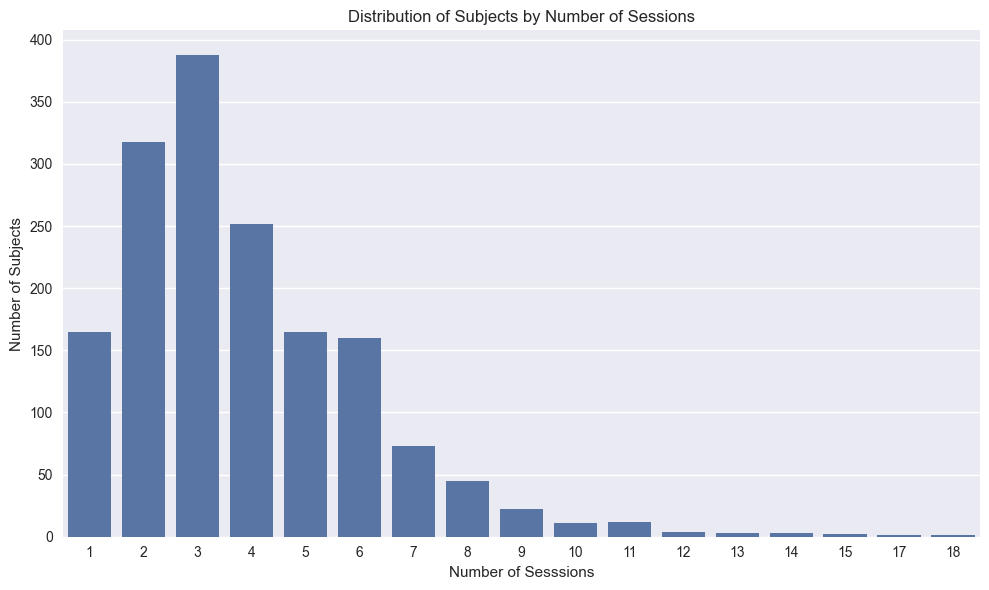

In [34]:
# Agrupar los sujetos por número de sesiones y visualizar la distribución de los sujetos dentro de cada grupo

# Calculate the number of sessions for each subject 
session_counts = GRF_COP_AP_PRO_right_train.groupby('SUBJECT_ID')['SESSION_ID'].nunique()

# Count the number of subjects in each group and sort in ascending order
session_counts_grouped = session_counts.value_counts().sort_values(ascending=True)
print(session_counts_grouped)

# Plot the countplot
plt.figure(figsize=(10, 6))
color = sns.color_palette()[0] # Get the first blue color from the Seaborn color palette
sns.countplot(x=session_counts, color = color)
plt.xlabel('Number of Sesssions')
plt.ylabel('Number of Subjects')
plt.title('Distribution of Subjects by Number of Sessions')
plt.tight_layout()
plt.show()

## Trials

- Cada individuo tiene diferentes trials (TRIAL_ID) en una misma sesión (SESSION_ID). 

POSTPROCESSED data: 
- TRIAL_ID: el número de TRIAL (cada individuo puede tener un número diferente de trials) y cada trial son estos 101 valores. 

- Separar por enfermedad: cuantos pacientes y número de trials. 

### ¿Hay varios trials por paciente?

In [60]:
# Iterate through the CSV files in the postprocessed_train folder
for file_name in os.listdir(POSTPROCESSED_TRAIN_FOLDER):
    if file_name.endswith(".csv"):
        # file path
        file_path = os.path.join(POSTPROCESSED_TRAIN_FOLDER, file_name)
        # read the CSV file
        df = pd.read_csv(file_path)
        # count the number of trials for each subject
        trial_counts = df.groupby('SUBJECT_ID')['TRIAL_ID'].nunique().sort_values(ascending=True)
        # check if there are subjects with a single trial or less
        subjects_with_single_trial = trial_counts[trial_counts <= 1]

        if not subjects_with_single_trial.empty:
            print(f"Subjects with single trials in {file_name}:")
            print(subjects_with_single_trial)
        else:
            print(f"All subjects in {file_name} have multiple trials.")


All subjects in GRF_F_AP_PRO_right_train.csv have multiple trials.
All subjects in GRF_COP_AP_PRO_right_train.csv have multiple trials.
All subjects in GRF_F_V_PRO_left_train.csv have multiple trials.
All subjects in GRF_F_ML_PRO_right_train.csv have multiple trials.
All subjects in GRF_F_ML_PRO_left_train.csv have multiple trials.
All subjects in GRF_F_AP_PRO_left_train.csv have multiple trials.
All subjects in GRF_COP_AP_PRO_left_train.csv have multiple trials.
All subjects in GRF_COP_ML_PRO_right_train.csv have multiple trials.
All subjects in GRF_COP_ML_PRO_left_train.csv have multiple trials.
All subjects in GRF_F_V_PRO_right_train.csv have multiple trials.


### Número máximo y mínimo de trials por paciente

In [67]:
# Iterate through the CSV files in the postprocessed_train folder
for file_name in os.listdir(POSTPROCESSED_TRAIN_FOLDER):
    if file_name.endswith(".csv"):
        # file path
        file_path = os.path.join(POSTPROCESSED_TRAIN_FOLDER, file_name)
        # read the CSV file
        df = pd.read_csv(file_path)
        
        # maximum number of unique trials for any subject
        max_trial_counts = df.groupby('SUBJECT_ID')['TRIAL_ID'].nunique().max()
        # minimum number of unique trials for any subject
        min_trial_counts = df.groupby('SUBJECT_ID')['TRIAL_ID'].nunique().min()

        print(f"Maximum number of trials in {file_name}: {max_trial_counts}")
        print(f"Minimum number of trials in {file_name}: {min_trial_counts}\n")

Maximum number of trials in GRF_F_AP_PRO_right_train.csv: 16
Minimum number of trials in GRF_F_AP_PRO_right_train.csv: 3

Maximum number of trials in GRF_COP_AP_PRO_right_train.csv: 16
Minimum number of trials in GRF_COP_AP_PRO_right_train.csv: 3

Maximum number of trials in GRF_F_V_PRO_left_train.csv: 16
Minimum number of trials in GRF_F_V_PRO_left_train.csv: 3

Maximum number of trials in GRF_F_ML_PRO_right_train.csv: 16
Minimum number of trials in GRF_F_ML_PRO_right_train.csv: 3

Maximum number of trials in GRF_F_ML_PRO_left_train.csv: 16
Minimum number of trials in GRF_F_ML_PRO_left_train.csv: 3

Maximum number of trials in GRF_F_AP_PRO_left_train.csv: 16
Minimum number of trials in GRF_F_AP_PRO_left_train.csv: 3

Maximum number of trials in GRF_COP_AP_PRO_left_train.csv: 16
Minimum number of trials in GRF_COP_AP_PRO_left_train.csv: 3

Maximum number of trials in GRF_COP_ML_PRO_right_train.csv: 16
Minimum number of trials in GRF_COP_ML_PRO_right_train.csv: 3

Maximum number of tria

### Comprobamos que el número de trials para cada miembro inferior (right, left) sean iguales para cada paciente


In [97]:
# Comprobamos que pacientes y trials sean iguales para cada miembro inferior (right, left)

# List of DataFrame pairs to compare
dataframe_pairs = [(GRF_COP_AP_PRO_right_train, GRF_COP_AP_PRO_left_train),
                   (GRF_COP_ML_PRO_right_train, GRF_COP_ML_PRO_left_train),
                   (GRF_F_AP_PRO_right_train, GRF_F_AP_PRO_left_train),
                   (GRF_F_ML_PRO_right_train, GRF_F_ML_PRO_left_train),
                   (GRF_F_V_PRO_right_train, GRF_F_V_PRO_left_train),
                  ]

# Iterate through the DataFrame pairs
for right_df, left_df in dataframe_pairs:
    # Check if the trial counts for the right and left sides are equal for each subject
    is_equal = (right_df.groupby('SUBJECT_ID')['TRIAL_ID'].nunique() ==
                left_df.groupby('SUBJECT_ID')['TRIAL_ID'].nunique()).all().all()
    
    if is_equal:
        print(f"The trial counts for right and left legs are EQUAL.")
    else:
        # print(f"The trial counts for {right_df.columns[0]} and {left_df.columns[0]} are not equal.")
        print(f"The trial counts for right and left legs are NOT equal.")

The trial counts for right and left legs are EQUAL.
The trial counts for right and left legs are EQUAL.
The trial counts for right and left legs are EQUAL.
The trial counts for right and left legs are EQUAL.
The trial counts for right and left legs are EQUAL.


### Número de trials por paciente

In [35]:
# List of dataframe names (como derecha e izquierda son iguales en términos de sujeto y trials, podemos escoger el miembro inferior que queramos)
dataframe_names = [
    'GRF_COP_AP_PRO_right_train',
    'GRF_COP_ML_PRO_right_train',
    'GRF_F_AP_PRO_right_train',
    'GRF_F_ML_PRO_right_train',
    'GRF_F_V_PRO_right_train'
]

In [104]:
# Iterate through the dataframe names
for name in dataframe_names:
    dataframe = pd.read_csv(os.path.join(POSTPROCESSED_TRAIN_FOLDER, f"{name}.csv"))
    
    # Count the number of trials for each subject
    trial_counts = dataframe.groupby('SUBJECT_ID')['TRIAL_ID'].nunique().sort_values(ascending=False)
    
    print(f"\nNumber of trials for each subject in {name}:")
    print(trial_counts)



Number of trials for each subject in GRF_COP_AP_PRO_right_train:
SUBJECT_ID
2152    16
1817    16
2377    15
1210    15
2115    15
        ..
2345     3
2247     3
1810     3
589      3
618      3
Name: TRIAL_ID, Length: 1625, dtype: int64

Number of trials for each subject in GRF_COP_ML_PRO_right_train:
SUBJECT_ID
2152    16
1817    16
2377    15
1210    15
2115    15
        ..
2345     3
2247     3
1810     3
589      3
618      3
Name: TRIAL_ID, Length: 1625, dtype: int64

Number of trials for each subject in GRF_F_AP_PRO_right_train:
SUBJECT_ID
2152    16
1817    16
2377    15
1210    15
2115    15
        ..
2345     3
2247     3
1810     3
589      3
618      3
Name: TRIAL_ID, Length: 1625, dtype: int64

Number of trials for each subject in GRF_F_ML_PRO_right_train:
SUBJECT_ID
2152    16
1817    16
2377    15
1210    15
2115    15
        ..
2345     3
2247     3
1810     3
589      3
618      3
Name: TRIAL_ID, Length: 1625, dtype: int64

Number of trials for each subject in GR

- El número de trials por paciente es el mismo en todos los CSV. 

In [36]:
# Escogemos un CSV aleatorio para contar el número de trials por paciente: 
GRF_COP_AP_PRO_right_train.groupby('SUBJECT_ID')['TRIAL_ID'].nunique().sort_values(ascending=False)

SUBJECT_ID
2152    16
1817    16
2377    15
1210    15
2115    15
        ..
2345     3
2247     3
1810     3
589      3
618      3
Name: TRIAL_ID, Length: 1625, dtype: int64

SUBJECT_ID
2152    16
1817    16
2377    15
1210    15
2115    15
829     15
64      15
1737    15
92      15
48      15
1666    15
211     15
21      15
580     15
1464    15
78      14
233     14
1803    14
1329    14
1356    14
2293    14
389     14
151     14
2031    14
1088    14
90      14
1261    14
1158    14
1160    14
639     14
1174    14
1185    14
127     14
126     14
2049    14
1976    14
66      14
1842    14
2177    14
374     14
1616    14
1608    14
1944    14
1565    14
29      14
12      14
49      14
1508    14
315     14
1497    13
Name: TRIAL_ID, dtype: int64


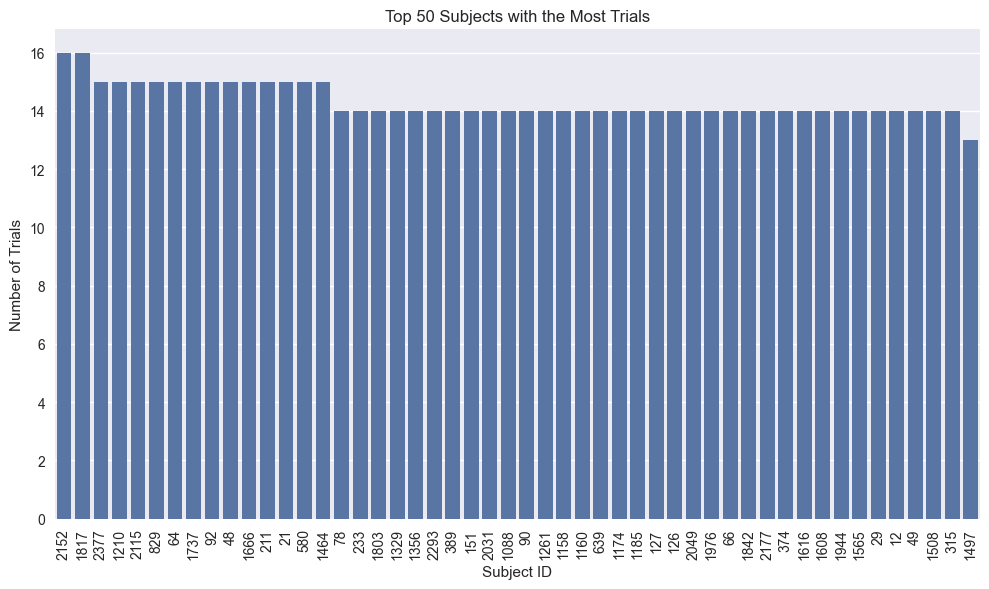

In [37]:
# Number of top subjects to plot
top_n = 50

# Calculate the number of trials for each subject and sort in descending order
trial_counts = GRF_COP_AP_PRO_right_train.groupby('SUBJECT_ID')['TRIAL_ID'].nunique().sort_values(ascending=False)

# Select the top N subjects
top_subjects = trial_counts.head(top_n)
print(top_subjects)

# Bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
color = sns.color_palette()[0] # Get the first blue color from the Seaborn color palette
sns.barplot(x=top_subjects.index, y=top_subjects.values, order = top_subjects.index, color=color)
plt.xlabel('Subject ID')
plt.ylabel('Number of Trials')
plt.title('Top {} Subjects with the Most Trials'.format(top_n))
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust the spacing
plt.show()

SUBJECT_ID
657     3
589     3
1820    3
1934    3
2247    3
2054    3
801     3
1444    3
815     3
415     3
2345    3
2092    3
618     3
1612    3
1810    3
1808    3
2181    3
984     3
1078    3
1101    3
303     3
1208    4
734     4
1702    4
768     4
1127    4
2329    4
1104    4
865     4
861     4
1718    4
834     4
1006    4
1435    4
366     4
1542    4
257     4
475     4
2203    4
1364    4
2058    4
347     5
1604    5
1997    5
2162    5
950     5
245     5
225     5
881     5
372     5
Name: TRIAL_ID, dtype: int64


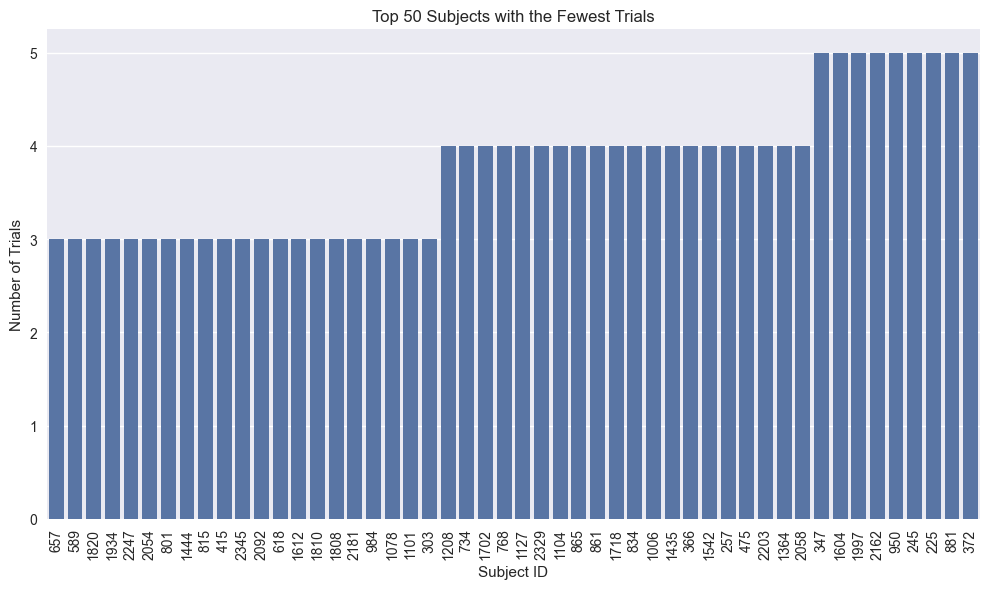

In [149]:
# Number of top subjects to plot
top_n = 50

# Calculate the number of trials for each subject and sort in descending order
trial_counts = GRF_COP_AP_PRO_right_train.groupby('SUBJECT_ID')['TRIAL_ID'].nunique().sort_values(ascending=True)

# Select the top N subjects
top_subjects = trial_counts.head(top_n)
print(top_subjects)

# Bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
color = sns.color_palette()[0] # Get the first blue color from the Seaborn color palette
sns.barplot(x=top_subjects.index, y=top_subjects.values, order = top_subjects.index, color = color)
plt.xlabel('Subject ID')
plt.ylabel('Number of Trials')
plt.title('Top {} Subjects with the Fewest Trials'.format(top_n))
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust the spacing
plt.show()

### Distribución de pacientes por número de trials

TRIAL_ID
16      2
15     13
6      14
5      17
4      20
3      21
7      32
14     34
8      53
13     69
9     126
12    252
11    285
10    687
Name: count, dtype: int64


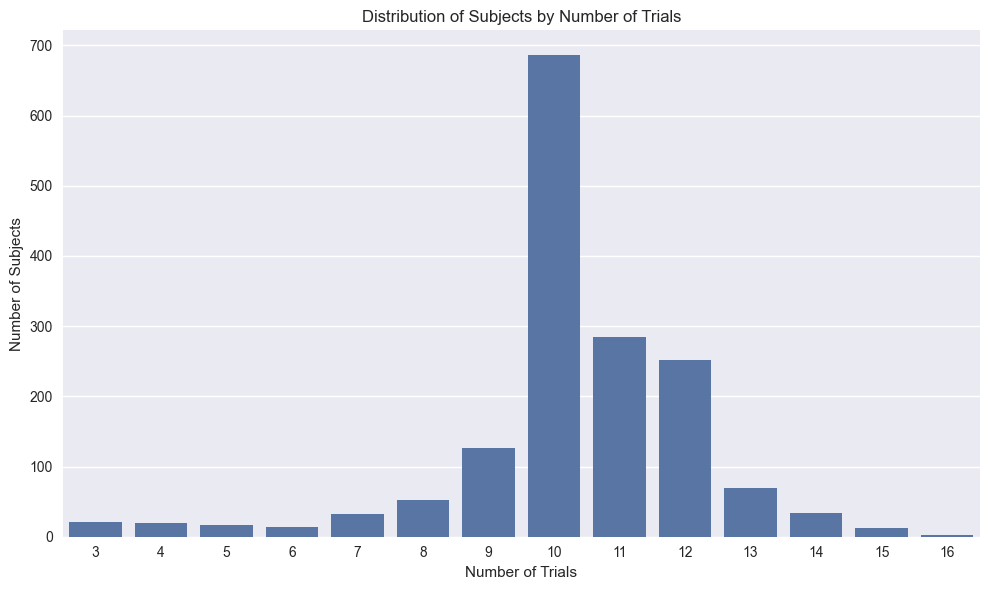

In [150]:
# Agrupar los sujetos por número de trials y visualizar la distribución de los sujetos dentro de cada grupo

# Calculate the number of trials for each subject 
trial_counts = GRF_COP_AP_PRO_right_train.groupby('SUBJECT_ID')['TRIAL_ID'].nunique()

# Count the number of subjects in each group and sort in ascending order
trial_counts_grouped = trial_counts.value_counts().sort_values(ascending=True)
print(trial_counts_grouped)

# Plot the countplot
plt.figure(figsize=(10, 6))
color = sns.color_palette()[0] # Get the first blue color from the Seaborn color palette
sns.countplot(x=trial_counts, color = color)
plt.xlabel('Number of Trials')
plt.ylabel('Number of Subjects')
plt.title('Distribution of Subjects by Number of Trials')
plt.tight_layout()
plt.show()

## Paths

In [38]:
DATA_ROOT = "./gaitrec_data"
# Train set
UNBALANCED_TRAIN_SET_METADATA_PATH = os.path.join(DATA_ROOT, "unbalanced_train_set_metadata.csv")
POSTPROCESSED_TRAIN_FOLDER = os.path.join(DATA_ROOT, 'postprocessed_train')
GROUPS_SESSIONS_DATA_TRAIN = os.path.join(DATA_ROOT, 'groups_sessions_data_train')
GRF_F_AP_PRO_DATA_TRAIN = os.path.join(DATA_ROOT, 'GRF_F_AP_PRO_data_train')
# Test set
TEST_SET_METADATA_PATH = os.path.join(DATA_ROOT, "test_set_metadata.csv")
TEST_FOLDER = os.path.join(DATA_ROOT, "test_set")
GROUPS_SESSIONS_DATA_TEST = os.path.join(DATA_ROOT, 'groups_sessions_data_test')
GRF_F_AP_PRO_DATA_TEST = os.path.join(DATA_ROOT, 'GRF_F_AP_PRO_data_test')


## Agrupar por grupo y número de sesiones

- Separamos los datos en grupos y sesiones. 
- Filtramos los datos en función del número deseado de sesiones y grupo, y guardamos los datos filtrados en carpetas específicas de grupos y sesiones para su posterior procesamiento o análisis.

- Debido a que la mayoría de sujetos tienen de 2 a 4 sesiones, hemos elegido este rango: nos quedamos con los pacientes que tengan 2, 3 o 4 sesiones. 

Estructura carpetas:
- groups_sessions_data_train
    - groups_2sessions_data_train
        - HC_data
        - ANKLE_data
        - KNEE_data
        - CALCANEUS_data
        - HIP_data
    - groups_3sessions_data_train
        - HC_data
        - ANKLE_data
        - KNEE_data
        - CALCANEUS_data
        - HIP_data
    - groups_4sessions_data_train
        - HC_data
        - ANKLE_data
        - KNEE_data
        - CALCANEUS_data
        - HIP_data

In [275]:
# Include the subjects with a specified number of sessions and the desired group
def filter_by_sessions_and_group(df, session_counts, metadata_df, num_sessions, group):
    # Filter the dataframe to include only the subjects with the specified number of sessions
    selected_subjects = session_counts[session_counts == num_sessions].index
    filtered_df = df[df['SUBJECT_ID'].isin(selected_subjects)]
    # Filter the dataframe to include only the subjects with the desired group
    group_subject_ids = metadata_df[metadata_df['CLASS_LABEL'] == group]['SUBJECT_ID'].unique()
    filtered_df = filtered_df[filtered_df['SUBJECT_ID'].isin(group_subject_ids)]
    return filtered_df

# Create a new filename by appending the group name to the original filename, and saves the filtered 
# dataframe to a new CSV file in the specified group folder path
def save_df_by_sessions_and_group(group_folder_path, filename, group, filtered_df):
    # Create a new dataframe name by appending '_group' to the filename
    new_filename = os.path.splitext(filename)[0] + '_' + group + '.csv'
    new_filepath = os.path.join(group_folder_path, new_filename)
    # Save the filtered dataframe to the new CSV file
    filtered_df.to_csv(new_filepath, index=False)

# Main function
def create_group_session_folders(set: str = 'train', min_sessions: int = 2, max_sessions: int = 4) -> None:
    if set == 'train':
        # Load metadata of the train set
        metadata_df = pd.read_csv(UNBALANCED_TRAIN_SET_METADATA_PATH)
        # Calculate the number of unique sessions per subject
        session_counts = metadata_df.groupby('SUBJECT_ID')['SESSION_ID'].nunique()

        # Create separate folders for patients with 2, 3, or 4 sessions
        for num_sessions in range(min_sessions, max_sessions + 1):
            folder_name = f"groups_{num_sessions}sessions_data_train"
            folder_path = os.path.join(GROUPS_SESSIONS_DATA_TRAIN, folder_name)
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)

            # Iterate over each group
            groups = metadata_df['CLASS_LABEL'].unique().tolist() # ['HC', 'C', 'H', 'K', 'A']
            for group in groups: # ['HC', 'ANKLE', 'KNEE', 'CALCANEUS', 'HIP']
                group_folder_path = os.path.join(folder_path, f"{group}_data")
                if not os.path.exists(group_folder_path):
                    os.makedirs(group_folder_path)

                # Iterate over each CSV file in the postprocessed folder
                for filename in os.listdir(POSTPROCESSED_TRAIN_FOLDER):
                    if filename.endswith(".csv"):
                        # File path
                        filepath = os.path.join(POSTPROCESSED_TRAIN_FOLDER, filename)
                        # Read the CSV file
                        df = pd.read_csv(filepath)
                        # Include the subjects with a specified number of sessions and the desired group
                        filtered_df = filter_by_sessions_and_group(df, 
                                                                   session_counts, 
                                                                   metadata_df, 
                                                                   num_sessions, group)
                        # Create a new filename by appending the group name to the original filename, 
                        # and saves the filtered dataframe to a new CSV file in the specified group folder path
                        save_df_by_sessions_and_group(group_folder_path, filename, group, filtered_df)


    elif set == 'test':
        # Load metadata of the train set
        metadata_df = pd.read_csv(TEST_SET_METADATA_PATH)
        # Calculate the number of unique sessions per subject
        session_counts = metadata_df.groupby('SUBJECT_ID')['SESSION_ID'].nunique()

        # Create separate folders for patients with 2, 3, or 4 sessions
        for num_sessions in range(min_sessions, max_sessions + 1):
            folder_name = f"groups_{num_sessions}sessions_data_test"
            folder_path = os.path.join(GROUPS_SESSIONS_DATA_TEST, folder_name)
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)

            # Iterate over each group
            groups = metadata_df['CLASS_LABEL'].unique().tolist() # ['HC', 'C', 'H', 'K', 'A']
            for group in groups: # ['HC', 'ANKLE', 'KNEE', 'CALCANEUS', 'HIP']
                group_folder_path = os.path.join(folder_path, f"{group}_data")
                if not os.path.exists(group_folder_path):
                    os.makedirs(group_folder_path)

                # Iterate over each CSV file in the postprocessed folder
                for filename in os.listdir(TEST_FOLDER):
                    if filename.endswith(".csv"):
                        # File path
                        filepath = os.path.join(TEST_FOLDER, filename)
                        # Read the CSV file
                        df = pd.read_csv(filepath)
                        # Include the subjects with a specified number of sessions and the desired group
                        filtered_df = filter_by_sessions_and_group(df, 
                                                                   session_counts, 
                                                                   metadata_df, 
                                                                   num_sessions, 
                                                                   group)
                        # Create a new filename by appending the group name to the original filename, 
                        # and saves the filtered dataframe to a new CSV file in the specified group folder path
                        save_df_by_sessions_and_group(group_folder_path, filename, group, filtered_df)

In [393]:
create_group_session_folders(set = 'train', 
                             min_sessions = 2, 
                             max_sessions = 4)

## Primera y última sesión por paciente

Nos quedamos sólo con la primera y la última sesión por paciente. 

**Primera aproximación de ejemplo:**

In [39]:
# HC
GROUPS_SESSIONS_DATA_TRAIN_ = os.path.join(DATA_ROOT, 'groups_sessions_data_train')
GROUPS_3_SESSIONS_DATA_TRAIN = os.path.join(GROUPS_SESSIONS_DATA_TRAIN_, 'groups_3sessions_data_train')

GROUPS_3_SESSIONS_DATA_TRAIN_SUNFOLDER = os.path.join(GROUPS_3_SESSIONS_DATA_TRAIN,  'HC_data')
GRF_COP_AP_PRO_left_train_HC = pd.read_csv(os.path.join(GROUPS_3_SESSIONS_DATA_TRAIN_SUNFOLDER, 'GRF_COP_AP_PRO_left_train_HC.csv'))

In [408]:
GRF_COP_AP_PRO_left_train_HC

SUBJECT_ID  SESSION_ID  TRIAL_ID  COP_AP_PRO_1  COP_AP_PRO_2  \
0             17       19749         1             0      0.000000   
1             17       19749         2             0     -0.000000   
2             17       19749         3             0      0.000000   
3             17       19749         4             0     -0.000000   
4             17       19749         5             0      0.000000   
...          ...         ...       ...           ...           ...   
2991          93   999910375         6             0     -0.001045   
2992          93   999910375         7             0      0.000823   
2993          93   999910375         9             0      0.000901   
2994          93   999910375        10             0      0.001457   
2995          93   999910375        11             0      0.000131   

      COP_AP_PRO_3  COP_AP_PRO_4  COP_AP_PRO_5  COP_AP_PRO_6  COP_AP_PRO_7  \
0        -0.001007     -0.004012     -0.003190     -0.000281      0.003471   
1         0.000306      0.003254      0.007542      0.011850      0.016156   
2         0.000272      0.002483      0.006289      0.010364      0.014252   
3         0.001079      0.003996      0.007686      0.011633      0.015741   
4         0.000044      0.001510      0.005372      0.009813      0.013987   
...            ...           ...           ...           ...           ...   
2991     -0.006022     -0.009066     -0.009344     -0.007169     -0.003294   
2992      0.004703      0.008245      0.011421      0.015026      0.019418   
2993      0.005189      0.009638      0.013294      0.016612      0.020099   
2994      0.009541      0.018710      0.026233      0.032481      0.038365   
2995      0.001138      0.003030      0.005631      0.008974      0.012988   

      ...  COP_AP_PRO_92  COP_AP_PRO_93  COP_AP_PRO_94  COP_AP_PRO_95  \
0     ...       0.217980       0.221811       0.225998       0.230334   
1     ...       0.221856       0.225936       0.230253       0.234791   
2     ...       0.226336       0.229909       0.233769       0.237575   
3     ...       0.230219       0.235528       0.241007       0.246432   
4     ...       0.228589       0.232754       0.237116       0.241522   
...   ...            ...            ...            ...            ...   
2991  ...       0.162041       0.162515       0.163036       0.163603   
2992  ...       0.191162       0.192653       0.195505       0.200189   
2993  ...       0.193466       0.194880       0.197735       0.202290   
2994  ...       0.207676       0.209430       0.212636       0.217456   
2995  ...       0.182735       0.182823       0.183036       0.183564   

      COP_AP_PRO_96  COP_AP_PRO_97  COP_AP_PRO_98  COP_AP_PRO_99  \
0          0.234303       0.237391       0.239436       0.240044   
1          0.239407       0.243668       0.246792       0.247206   
2          0.240837       0.243178       0.244326       0.244521   
3          0.251401       0.255376       0.258025       0.258472   
4          0.245818       0.249779       0.253109       0.254625   
...             ...            ...            ...            ...   
2991       0.164219       0.164883       0.165583       0.166200   
2992       0.206279       0.212997       0.218801       0.221163   
2993       0.208788       0.216311       0.223442       0.227585   
2994       0.223488       0.230088       0.235668       0.237233   
2995       0.184523       0.185926       0.187665       0.189292   

      COP_AP_PRO_100  COP_AP_PRO_101  
0           0.240044        0.240044  
1           0.247206        0.247206  
2           0.244521        0.244521  
3           0.258472        0.258472  
4           0.254625        0.254625  
...              ...             ...  
2991        0.166476        0.166497  
2992        0.221163        0.221163  
2993        0.227585        0.227585  
2994        0.237233        0.237233  
2995        0.189873        0.189873  

[2996 rows x 104 columns]

In [409]:
GRF_COP_AP_PRO_left_train_HC[GRF_COP_AP_PRO_left_train_HC['SUBJECT_ID']==17][['SUBJECT_ID','SESSION_ID']]

SUBJECT_ID  SESSION_ID
0           17       19749
1           17       19749
2           17       19749
3           17       19749
4           17       19749
5           17       19749
6           17       19749
7           17       19749
8           17       19749
9           17       19750
10          17       19750
11          17       19750
12          17       19750
13          17       19750
14          17       19750
15          17       19750
16          17       19750
17          17       19750
18          17       19751
19          17       19751
20          17       19751
21          17       19751
22          17       19751
23          17       19751
24          17       19751
25          17       19751

In [410]:
# Count how many sessions in patient 17
GRF_COP_AP_PRO_left_train_HC[GRF_COP_AP_PRO_left_train_HC['SUBJECT_ID']==17]['SESSION_ID'].value_counts().sort_index()

SESSION_ID
19749    9
19750    9
19751    8
Name: count, dtype: int64

- Hay varias sesiones para el paciente. Nos tenemos que quedar solo con la primera y la última sesión. 

In [40]:
# Group the data by 'SUBJECT_ID' and select the first and last sessions
first_last_sessions = GRF_COP_AP_PRO_left_train_HC[GRF_COP_AP_PRO_left_train_HC['SUBJECT_ID']==17].groupby('SUBJECT_ID')['SESSION_ID'].agg(['first', 'last'])
first_last_sessions

first   last
SUBJECT_ID              
17          19749  19751

In [41]:
# Filter the original data using the selected first and last session IDs
filtered_data = GRF_COP_AP_PRO_left_train_HC[GRF_COP_AP_PRO_left_train_HC['SUBJECT_ID']==17][GRF_COP_AP_PRO_left_train_HC[
    GRF_COP_AP_PRO_left_train_HC['SUBJECT_ID']==17]['SESSION_ID'].isin(first_last_sessions.values.flatten())]

# Print the resulting DataFrame
display(filtered_data)

SUBJECT_ID  SESSION_ID  TRIAL_ID  COP_AP_PRO_1  COP_AP_PRO_2  COP_AP_PRO_3  \
8          17       19749  5.333333           0.0  0.000000e+00      0.001090   
9          17       19751  5.500000           0.0  4.553123e-08      0.001117   

   COP_AP_PRO_4  COP_AP_PRO_5  COP_AP_PRO_6  COP_AP_PRO_7  ...  COP_AP_PRO_92  \
8      0.003960      0.007844      0.011975      0.016147  ...       0.228129   
9      0.005151      0.009136      0.012520      0.015625  ...       0.226369   

   COP_AP_PRO_93  COP_AP_PRO_94  COP_AP_PRO_95  COP_AP_PRO_96  COP_AP_PRO_97  \
8       0.232718       0.237648       0.242686       0.247498       0.251648   
9       0.230538       0.234887       0.239317       0.243600       0.247335   

   COP_AP_PRO_98  COP_AP_PRO_99  COP_AP_PRO_100  COP_AP_PRO_101  
8       0.254743       0.255389        0.255389        0.255389  
9       0.250049       0.250628        0.250628        0.250628  

[2 rows x 104 columns]

**A todo el DataFrame:**

In [42]:
# Group the data by 'SUBJECT_ID' and select the first and last sessions
first_last_sessions = GRF_COP_AP_PRO_left_train_HC.groupby('SUBJECT_ID')['SESSION_ID'].agg(['first', 'last'])
first_last_sessions

first       last
SUBJECT_ID                      
2           888812548  888812550
8               29874      29877
12              30882      30884
15              30472      30475
17              19749      19751
...               ...        ...
200             43240      43242
202             43303      43305
203             43323      43325
205             29869      29872
211             39959      39961

[99 rows x 2 columns]

In [43]:
# Filter the original data using the selected first and last session IDs
filtered_data = GRF_COP_AP_PRO_left_train_HC[GRF_COP_AP_PRO_left_train_HC['SESSION_ID'].isin(first_last_sessions.values.flatten())]

# Print the resulting DataFrame
display(filtered_data.head(50))

SUBJECT_ID  SESSION_ID  TRIAL_ID  COP_AP_PRO_1  COP_AP_PRO_2  \
0            2   888812548  6.000000           0.0  0.000000e+00   
1            2   888812550  6.100000           0.0  7.401520e-05   
2            8       29874  5.222222           0.0  0.000000e+00   
3            8       29877  5.500000           0.0  0.000000e+00   
4           12       30882  5.400000           0.0  0.000000e+00   
5           12       30884  7.272727           0.0  5.947867e-07   
6           15       30472  6.300000           0.0  0.000000e+00   
7           15       30475  5.600000           0.0  0.000000e+00   
8           17       19749  5.333333           0.0  0.000000e+00   
9           17       19751  5.500000           0.0  4.553123e-08   
10          18       30036  7.000000           0.0  5.793688e-06   
11          18       30038  7.000000           0.0  0.000000e+00   
12          20       29843  5.888889           0.0  6.497196e-05   
13          20       29845  6.833333           0.0 -1.079497e-05   
14          21       29805  6.090909           0.0  0.000000e+00   
15          21       29807  8.000000           0.0  3.107011e-05   
16          24       39725  6.000000           0.0  0.000000e+00   
17          24       39727  5.666667           0.0  0.000000e+00   
18          25       30399  6.583333           0.0  0.000000e+00   
19          25       30403  7.000000           0.0  7.634933e-05   
20          32       30280  6.142857           0.0 -8.877242e-05   
21          32       30282  5.500000           0.0  2.460188e-04   
22          33       39722  4.333333           0.0  0.000000e+00   
23          33       39724  6.000000           0.0  0.000000e+00   
24          37       40008  6.125000           0.0  5.496921e-06   
25          37       40010  7.000000           0.0  6.806975e-05   
26          40       39895  5.222222           0.0  9.645109e-07   
27          40       39897  5.000000           0.0  0.000000e+00   
28          42       30825  7.000000           0.0  0.000000e+00   
29          42       30827  6.555556           0.0  0.000000e+00   
30          46       30822  6.500000           0.0  0.000000e+00   
31          46       30824  4.000000           0.0  0.000000e+00   
32          49       30253  7.000000           0.0  0.000000e+00   
33          49       30256  6.000000           0.0  8.897849e-06   
34          51       30294  7.000000           0.0  0.000000e+00   
35          51       30297  6.833333           0.0  0.000000e+00   
36          52       30599  6.500000           0.0  0.000000e+00   
37          52       30602  6.500000           0.0  7.670798e-05   
38          55       30283  5.700000           0.0  0.000000e+00   
39          55       30285  5.666667           0.0  0.000000e+00   
40          60       30174  6.500000           0.0  0.000000e+00   
41          60       30177  7.250000           0.0  1.982108e-04   
42          61       30405  7.000000           0.0  0.000000e+00   
43          61       30407  6.000000           0.0 -1.530213e-05   
44          62       29890  5.500000           0.0  0.000000e+00   
45          62       29892  5.500000           0.0  2.815294e-05   
46          63       29786  6.500000           0.0  2.643612e-04   
47          63       29788  6.500000           0.0  5.581223e-04   
48          64       29884  6.916667           0.0  0.000000e+00   
49          64       29889  8.500000           0.0  0.000000e+00   

    COP_AP_PRO_3  COP_AP_PRO_4  COP_AP_PRO_5  COP_AP_PRO_6  COP_AP_PRO_7  ...  \
0   1.387627e-03      0.005690      0.012148      0.019614      0.026891  ...   
1   1.152295e-03      0.003479      0.006922      0.011244      0.016067  ...   
2   3.399456e-04      0.003958      0.011221      0.020620      0.030468  ...   
3   4.401403e-04      0.003271      0.009092      0.017058      0.025936  ...   
4   9.824340e-05      0.001796      0.004979      0.009181      0.013767  ...   
5   1.787500e-03      0.006054      0.010181     

### A todas los archivos CSV de los diferentes grupos y sesiones

In [276]:
def select_first_last_sessions(set: str = 'train',  
                               min_sessions: int = 2, 
                               max_sessions: int = 4) -> None:

    if set == 'train':
        # Iterate over the session folders
        for session in range(min_sessions, max_sessions + 1):
            session_folder = os.path.join(GROUPS_SESSIONS_DATA_TRAIN, 
                                          f'groups_{session}sessions_data_train')
            
            # Load metadata of the train set and get the groups
            metadata_df = pd.read_csv(UNBALANCED_TRAIN_SET_METADATA_PATH) 
            groups = metadata_df['CLASS_LABEL'].unique().tolist() # ['HC', 'C', 'H', 'K', 'A']
            
            # Iterate over the group folders
            for group in groups: 
                group_folder = os.path.join(session_folder, f'{group}_data')
                # Iterate over the CSV files in the group folder
                for filename in os.listdir(group_folder):
                    if filename.endswith(".csv"):
                        # File path
                        filepath = os.path.join(group_folder, filename)
                         # Read the CSV file
                        df = pd.read_csv(filepath)
                        # Group the data by 'SUBJECT_ID' and select the first and last sessions
                        first_last_sessions = df.groupby('SUBJECT_ID')['SESSION_ID'].agg(
                            ['first', 'last'])
                        # Filter the data and create a new DataFrame with the selected first and 
                        # last session IDs
                        filtered_df = df[df['SESSION_ID'].isin(
                            first_last_sessions.values.flatten())]
                        # Overwrite the original CSV file with the filtered data
                        filtered_df.to_csv(filepath, index=False)

    elif set == 'test':
        # Iterate over the session folders
        for session in range(min_sessions, max_sessions + 1):
            session_folder = os.path.join(GROUPS_SESSIONS_DATA_TEST, 
                                          f'groups_{session}sessions_data_test')
            
            # Load metadata of the train set and get the groups
            metadata_df = pd.read_csv(TEST_SET_METADATA_PATH) 
            groups = metadata_df['CLASS_LABEL'].unique().tolist() # ['HC', 'C', 'H', 'K', 'A']
            
            # Iterate over the group folders
            for group in groups: 
                group_folder = os.path.join(session_folder, f'{group}_data')
                # Iterate over the CSV files in the group folder
                for filename in os.listdir(group_folder):
                    if filename.endswith(".csv"):
                        # File path
                        filepath = os.path.join(group_folder, filename)
                         # Read the CSV file
                        df = pd.read_csv(filepath)
                        # Group the data by 'SUBJECT_ID' and select the first and last sessions
                        first_last_sessions = df.groupby('SUBJECT_ID')['SESSION_ID'].agg(
                            ['first', 'last'])
                        # Filter the data and create a new DataFrame with the selected first 
                        # and last session IDs
                        filtered_df = df[df['SESSION_ID'].isin(
                            first_last_sessions.values.flatten())]
                        # Overwrite the original CSV file with the filtered data
                        filtered_df.to_csv(filepath, index=False)

In [425]:
select_first_last_sessions(set = 'train',  
                           min_sessions = 2, 
                           max_sessions = 4)

Comprobación de que se ha ejecutado correctamente: 

In [426]:
# Antes de seleccionar la primera y la última sesión 
GRF_COP_AP_PRO_left_train_HC[GRF_COP_AP_PRO_left_train_HC['SUBJECT_ID']==17]

SUBJECT_ID  SESSION_ID  TRIAL_ID  COP_AP_PRO_1  COP_AP_PRO_2  \
0           17       19749         1             0  0.000000e+00   
1           17       19749         2             0 -0.000000e+00   
2           17       19749         3             0  0.000000e+00   
3           17       19749         4             0 -0.000000e+00   
4           17       19749         5             0  0.000000e+00   
5           17       19749         6             0 -0.000000e+00   
6           17       19749         8             0 -0.000000e+00   
7           17       19749         9             0  0.000000e+00   
8           17       19749        10             0 -0.000000e+00   
9           17       19750         2             0  1.617159e-05   
10          17       19750         3             0 -1.674872e-05   
11          17       19750         4             0  1.135799e-03   
12          17       19750         5             0  2.429482e-05   
13          17       19750         6             0  6.272391e-04   
14          17       19750         7             0 -1.127210e-04   
15          17       19750         8             0  1.478324e-04   
16          17       19750         9             0  7.729045e-06   
17          17       19750        10             0  3.509737e-05   
18          17       19751         1             0 -0.000000e+00   
19          17       19751         2             0  0.000000e+00   
20          17       19751         4             0  0.000000e+00   
21          17       19751         5             0 -0.000000e+00   
22          17       19751         6             0  0.000000e+00   
23          17       19751         7             0 -0.000000e+00   
24          17       19751         9             0  3.642498e-07   
25          17       19751        10             0  0.000000e+00   

    COP_AP_PRO_3  COP_AP_PRO_4  COP_AP_PRO_5  COP_AP_PRO_6  COP_AP_PRO_7  ...  \
0      -0.001007     -0.004012     -0.003190     -0.000281      0.003471  ...   
1       0.000306      0.003254      0.007542      0.011850      0.016156  ...   
2       0.000272      0.002483      0.006289      0.010364      0.014252  ...   
3       0.001079      0.003996      0.007686      0.011633      0.015741  ...   
4       0.000044      0.001510      0.005372      0.009813      0.013987  ...   
5       0.004254      0.010714      0.015674      0.019961      0.024188  ...   
6       0.002187      0.006593      0.011015      0.015314      0.019642  ...   
7       0.002782      0.009376      0.014572      0.018965      0.023194  ...   
8      -0.000106      0.001730      0.005640      0.010160      0.014689  ...   
9       0.000618      0.002053      0.003760      0.006268      0.009619  ...   
10      0.000054      0.001087      0.003653      0.007757      0.012686  ...   
11      0.008888      0.018727      0.026351      0.032006      0.036611  ...   
12      0.000643      0.002734      0.006105      0.010663      0.016152  ...   
13      0.004999      0.011335      0.017283      0.022445      0.026950  ...   
14     -0.001536     -0.003518     -0.003281     -0.000770      0.003522  ...   
15      0.002013      0.006176      0.010760      0.015429      0.019994  ...   
16      0.000407      0.002077      0.005171      0.009576      0.014788  ...   
17      0.000608      0.002436      0.005428      0.009285      0.013559  ...   
18      0.002261      0.007166      0.011476      0.014476      0.017059  ...   
19      0.000714      0.004472      0.007914      0.011125      0.014356  ...   
20      0.000589      0.004779      0.008236      0.011096      0.013863  ...   
21     -0.000090      0.002910      0.007282      0.011193      0.014465  ...   
22      0.001168      0.006058      0.009825      0.012967      0.016087  ...   
23      0.002050      0.006082      0.009712      0.012739      0.015602  ...   
24      0.001295      0.005099      0.009596      0.013521      0.016788  ...   
25      0.000948      0.004640      0.009047      0.013044   

In [44]:
# Después de seleccionar la primera y la última sesión 
GRF_COP_AP_PRO_left_train_HC_session = pd.read_csv(os.path.join(DATA_ROOT, 
                                                                'groups_sessions_data_train/groups_3sessions_data_train/HC_data/GRF_COP_AP_PRO_left_train_HC.csv'))
GRF_COP_AP_PRO_left_train_HC_session[GRF_COP_AP_PRO_left_train_HC_session['SUBJECT_ID']==17]

SUBJECT_ID  SESSION_ID  TRIAL_ID  COP_AP_PRO_1  COP_AP_PRO_2  COP_AP_PRO_3  \
8          17       19749  5.333333           0.0  0.000000e+00      0.001090   
9          17       19751  5.500000           0.0  4.553123e-08      0.001117   

   COP_AP_PRO_4  COP_AP_PRO_5  COP_AP_PRO_6  COP_AP_PRO_7  ...  COP_AP_PRO_92  \
8      0.003960      0.007844      0.011975      0.016147  ...       0.228129   
9      0.005151      0.009136      0.012520      0.015625  ...       0.226369   

   COP_AP_PRO_93  COP_AP_PRO_94  COP_AP_PRO_95  COP_AP_PRO_96  COP_AP_PRO_97  \
8       0.232718       0.237648       0.242686       0.247498       0.251648   
9       0.230538       0.234887       0.239317       0.243600       0.247335   

   COP_AP_PRO_98  COP_AP_PRO_99  COP_AP_PRO_100  COP_AP_PRO_101  
8       0.254743       0.255389        0.255389        0.255389  
9       0.250049       0.250628        0.250628        0.250628  

[2 rows x 104 columns]

## Media de los trials por sesión para cada paciente

- Cada paciente para cada sesión puede tener diferentes trials. 
- Calculamos la media de los trials por sesión para cada paciente. 

**Primera aproximación de ejemplo:**

In [437]:
GRF_COP_AP_PRO_left_train_HC = pd.read_csv(os.path.join(DATA_ROOT, 
                                                        'groups_sessions_data_train/groups_3sessions_data_train/HC_data/GRF_COP_AP_PRO_left_train_HC.csv'))
GRF_COP_AP_PRO_left_train_HC[GRF_COP_AP_PRO_left_train_HC['SUBJECT_ID']==17]

SUBJECT_ID  SESSION_ID  TRIAL_ID  COP_AP_PRO_1  COP_AP_PRO_2  \
0           17       19749         1             0  0.000000e+00   
1           17       19749         2             0 -0.000000e+00   
2           17       19749         3             0  0.000000e+00   
3           17       19749         4             0 -0.000000e+00   
4           17       19749         5             0  0.000000e+00   
5           17       19749         6             0 -0.000000e+00   
6           17       19749         8             0 -0.000000e+00   
7           17       19749         9             0  0.000000e+00   
8           17       19749        10             0 -0.000000e+00   
9           17       19751         1             0 -0.000000e+00   
10          17       19751         2             0  0.000000e+00   
11          17       19751         4             0  0.000000e+00   
12          17       19751         5             0 -0.000000e+00   
13          17       19751         6             0  0.000000e+00   
14          17       19751         7             0 -0.000000e+00   
15          17       19751         9             0  3.642498e-07   
16          17       19751        10             0  0.000000e+00   

    COP_AP_PRO_3  COP_AP_PRO_4  COP_AP_PRO_5  COP_AP_PRO_6  COP_AP_PRO_7  ...  \
0      -0.001007     -0.004012     -0.003190     -0.000281      0.003471  ...   
1       0.000306      0.003254      0.007542      0.011850      0.016156  ...   
2       0.000272      0.002483      0.006289      0.010364      0.014252  ...   
3       0.001079      0.003996      0.007686      0.011633      0.015741  ...   
4       0.000044      0.001510      0.005372      0.009813      0.013987  ...   
5       0.004254      0.010714      0.015674      0.019961      0.024188  ...   
6       0.002187      0.006593      0.011015      0.015314      0.019642  ...   
7       0.002782      0.009376      0.014572      0.018965      0.023194  ...   
8      -0.000106      0.001730      0.005640      0.010160      0.014689  ...   
9       0.002261      0.007166      0.011476      0.014476      0.017059  ...   
10      0.000714      0.004472      0.007914      0.011125      0.014356  ...   
11      0.000589      0.004779      0.008236      0.011096      0.013863  ...   
12     -0.000090      0.002910      0.007282      0.011193      0.014465  ...   
13      0.001168      0.006058      0.009825      0.012967      0.016087  ...   
14      0.002050      0.006082      0.009712      0.012739      0.015602  ...   
15      0.001295      0.005099      0.009596      0.013521      0.016788  ...   
16      0.000948      0.004640      0.009047      0.013044      0.016780  ...   

    COP_AP_PRO_92  COP_AP_PRO_93  COP_AP_PRO_94  COP_AP_PRO_95  COP_AP_PRO_96  \
0        0.217980       0.221811       0.225998       0.230334       0.234303   
1        0.221856       0.225936       0.230253       0.234791       0.239407   
2        0.226336       0.229909       0.233769       0.237575       0.240837   
3        0.230219       0.235528       0.241007       0.246432       0.251401   
4        0.228589       0.232754       0.237116       0.241522       0.245818   
5        0.230446       0.235627       0.241392       0.247328       0.253010   
6        0.233147       0.238510       0.244119       0.249783       0.255272   
7        0.235054       0.239779       0.244998       0.250464       0.255859   
8        0.229532       0.234605       0.240180       0.245945       0.251572   
9        0.225991       0.230256       0.234644       0.238873       0.242736   
10       0.231061       0.235399       0.239790       0.244144       0.248491   
11       0.230443       0.234145       0.237865       0.241456       0.244705   
12       0.220056       0.223962       0.227965       0.232128       0.236319   
13       0.219203       0.223261       0.228090       0.233440       0.238758   
14       0.237234       0.240751       0.244310       0.248136       0.252004   
15       0.216862       

Mi df tiene 104 columnas. La primera columna es SUBJECT_ID, la segunda SESSION_ID y la tercera TRIAL_ID. 
El resto de las columnas son valores numéricos que representan la misma medida a lo largo del tiempo para cada paciente en una sesión y en un trial. 
Para cada paciente y sesión quiero calcular el valor medio de los trials en esa sesión.

- Agrupar por paciente o sujeto y sessión
- Calcular la media para cada columna 

In [438]:
# Group the data by SUBJECT_ID and SESSION_ID, and calculate the mean for each group
GRF_COP_AP_PRO_left_train_HC[GRF_COP_AP_PRO_left_train_HC['SUBJECT_ID']==17].groupby(['SUBJECT_ID', 'SESSION_ID']).mean()

TRIAL_ID  COP_AP_PRO_1  COP_AP_PRO_2  COP_AP_PRO_3  \
SUBJECT_ID SESSION_ID                                                       
17         19749       5.333333           0.0  0.000000e+00      0.001090   
           19751       5.500000           0.0  4.553123e-08      0.001117   

                       COP_AP_PRO_4  COP_AP_PRO_5  COP_AP_PRO_6  COP_AP_PRO_7  \
SUBJECT_ID SESSION_ID                                                           
17         19749           0.003960      0.007844      0.011975      0.016147   
           19751           0.005151      0.009136      0.012520      0.015625   

                       COP_AP_PRO_8  COP_AP_PRO_9  ...  COP_AP_PRO_92  \
SUBJECT_ID SESSION_ID                              ...                  
17         19749           0.020594      0.025664  ...       0.228129   
           19751           0.018945      0.022963  ...       0.226369   

                       COP_AP_PRO_93  COP_AP_PRO_94  COP_AP_PRO_95  \
SUBJECT_ID SESSION_ID                                                
17         19749            0.232718       0.237648       0.242686   
           19751            0.230538       0.234887       0.239317   

                       COP_AP_PRO_96  COP_AP_PRO_97  COP_AP_PRO_98  \
SUBJECT_ID SESSION_ID                                                
17         19749            0.247498       0.251648       0.254743   
           19751            0.243600       0.247335       0.250049   

                       COP_AP_PRO_99  COP_AP_PRO_100  COP_AP_PRO_101  
SUBJECT_ID SESSION_ID                                                 
17         19749            0.255389        0.255389        0.255389  
           19751            0.250628        0.250628        0.250628  

[2 rows x 102 columns]

In [442]:
# Group the data by SUBJECT_ID and SESSION_ID, and calculate the mean for each group
GRF_COP_AP_PRO_left_train_HC_df = GRF_COP_AP_PRO_left_train_HC.groupby(['SUBJECT_ID', 'SESSION_ID']).mean()
GRF_COP_AP_PRO_left_train_HC_df

TRIAL_ID  COP_AP_PRO_1  COP_AP_PRO_2  COP_AP_PRO_3  \
SUBJECT_ID SESSION_ID                                                       
2          888812548   6.000000           0.0      0.000000      0.001388   
           888812550   6.100000           0.0      0.000074      0.001152   
8          29874       5.222222           0.0      0.000000      0.000340   
           29877       5.500000           0.0      0.000000      0.000440   
12         30882       5.400000           0.0      0.000000      0.000098   
...                         ...           ...           ...           ...   
203        43325       6.333333           0.0      0.000000      0.001089   
205        29869       5.500000           0.0      0.000000      0.000586   
           29872       5.500000           0.0     -0.000004      0.000616   
211        39959       5.555556           0.0      0.000000      0.000265   
           39961       6.909091           0.0      0.000000      0.000708   

                       COP_AP_PRO_4  COP_AP_PRO_5  COP_AP_PRO_6  COP_AP_PRO_7  \
SUBJECT_ID SESSION_ID                                                           
2          888812548       0.005690      0.012148      0.019614      0.026891   
           888812550       0.003479      0.006922      0.011244      0.016067   
8          29874           0.003958      0.011221      0.020620      0.030468   
           29877           0.003271      0.009092      0.017058      0.025936   
12         30882           0.001796      0.004979      0.009181      0.013767   
...                             ...           ...           ...           ...   
203        43325           0.005310      0.009498      0.013153      0.016665   
205        29869           0.003760      0.008186      0.013374      0.018902   
           29872           0.003143      0.007084      0.012272      0.018168   
211        39959           0.003889      0.009543      0.015451      0.021379   
           39961           0.006196      0.012730      0.019432      0.025881   

                       COP_AP_PRO_8  COP_AP_PRO_9  ...  COP_AP_PRO_92  \
SUBJECT_ID SESSION_ID                              ...                  
2          888812548       0.033070      0.038081  ...       0.248381   
           888812550       0.020962      0.025583  ...       0.256252   
8          29874           0.039453      0.046973  ...       0.253871   
           29877           0.034455      0.041950  ...       0.251364   
12         30882           0.018525      0.023335  ...       0.206980   
...                             ...           ...  ...            ...   
203        43325           0.020456      0.024550  ...       0.239334   
205        29869           0.024453      0.029819  ...       0.217916   
           29872           0.024226      0.030021  ...       0.212020   
211        39959           0.027178      0.032655  ...       0.201662   
           39961           0.031984      0.037659  ...       0.210995   

                       COP_AP_PRO_93  COP_AP_PRO_94  COP_AP_PRO_95  \
SUBJECT_ID SESSION_ID                                                
2          888812548        0.253382       0.258534       0.263553   
           888812550        0.258853       0.261361       0.263662   
8          29874            0.258906       0.264381       0.269959   
           29877            0.256615       0.262388       0.268401   
12         30882            0.212060       0.217912       0.223965   
...                              ...            ...            ...   
203        43325            0.245179       0.251683       0.258561   
205        29869            0.220868       0.224359       0.228386   
           29872            0.214636       0.217913       0.221832   
211        39959            0.205662       0.210485       0.215968   
           39961            0.214336       0.218368       0.223072   

                       COP_AP_PRO_96  COP_AP_PRO_97  COP_AP_PRO_98  \
SUBJECT_ID SESSION_ID               

### A todas los archivos CSV de los diferentes grupos

Calculamos el valor medio de los trials en cada sesión para cada paciente.

In [277]:
def avg_trials(set: str = 'train',  
                min_sessions: int = 2, 
                max_sessions: int = 4) -> None:

    if set == 'train':
        # Iterate over the session folders
        for session in range(min_sessions, max_sessions + 1):
            session_folder = os.path.join(GROUPS_SESSIONS_DATA_TRAIN, 
                                          f'groups_{session}sessions_data_train')
            
            # Load metadata of the train set and get the groups
            metadata_df = pd.read_csv(UNBALANCED_TRAIN_SET_METADATA_PATH) 
            groups = metadata_df['CLASS_LABEL'].unique().tolist() # ['HC', 'C', 'H', 'K', 'A']
            
            # Iterate over the group folders
            for group in groups: 
                group_folder = os.path.join(session_folder, f'{group}_data')
                # Iterate over the CSV files in the group folder
                for filename in os.listdir(group_folder):
                    if filename.endswith(".csv"):
                        # File path
                        filepath = os.path.join(group_folder, filename)
                         # Read the CSV file
                        df = pd.read_csv(filepath)
                        # Group the data by 'SUBJECT_ID' and 'SESSION_ID' and calculate the mean 
                        # value for trials in each session for each patient 
                        session_means = df.groupby(['SUBJECT_ID', 'SESSION_ID']).mean()
                        # Reset the index to convert the grouped columns back to regular columns
                        session_means = session_means.reset_index()
                        # Overwrite the original CSV file with the trial means
                        session_means.to_csv(filepath, index=False)

    elif set == 'test':
        # Iterate over the session folders
        for session in range(min_sessions, max_sessions + 1):
            session_folder = os.path.join(GROUPS_SESSIONS_DATA_TEST, 
                                          f'groups_{session}sessions_data_test')
            
            # Load metadata of the train set and get the groups
            metadata_df = pd.read_csv(TEST_SET_METADATA_PATH) 
            groups = metadata_df['CLASS_LABEL'].unique().tolist() # ['HC', 'C', 'H', 'K', 'A']
            
            # Iterate over the group folders
            for group in groups: 
                group_folder = os.path.join(session_folder, f'{group}_data')
                # Iterate over the CSV files in the group folder
                for filename in os.listdir(group_folder):
                    if filename.endswith(".csv"):
                        # File path
                        filepath = os.path.join(group_folder, filename)
                        # Read the CSV file
                        df = pd.read_csv(filepath)
                        # Group the data by 'SUBJECT_ID' and 'SESSION_ID' and calculate the mean 
                        # value for trials in each session for each patient 
                        session_means = df.groupby(['SUBJECT_ID', 'SESSION_ID']).mean()
                        # Reset the index to convert the grouped columns back to regular columns
                        session_means = session_means.reset_index()
                        # Overwrite the original CSV file with the trial means
                        session_means.to_csv(filepath, index=False)

In [447]:
# Calculamos el valor medio de los trials en cada sesión para cada paciente.
avg_trials(set = 'train',  
           min_sessions = 2, 
           max_sessions = 4)

Comprobación de que se ha ejecutado correctamente: 

In [45]:
# BEFORE the function avg_trials
GRF_COP_AP_PRO_left_train_HC_df = GRF_COP_AP_PRO_left_train_HC.groupby(['SUBJECT_ID', 'SESSION_ID']).mean()
GRF_COP_AP_PRO_left_train_HC_df

TRIAL_ID  COP_AP_PRO_1  COP_AP_PRO_2  COP_AP_PRO_3  \
SUBJECT_ID SESSION_ID                                                       
2          888812548   6.000000           0.0      0.000000      0.001388   
           888812550   6.100000           0.0      0.000074      0.001152   
8          29874       5.222222           0.0      0.000000      0.000340   
           29877       5.500000           0.0      0.000000      0.000440   
12         30882       5.400000           0.0      0.000000      0.000098   
...                         ...           ...           ...           ...   
203        43325       6.333333           0.0      0.000000      0.001089   
205        29869       5.500000           0.0      0.000000      0.000586   
           29872       5.500000           0.0     -0.000004      0.000616   
211        39959       5.555556           0.0      0.000000      0.000265   
           39961       6.909091           0.0      0.000000      0.000708   

                       COP_AP_PRO_4  COP_AP_PRO_5  COP_AP_PRO_6  COP_AP_PRO_7  \
SUBJECT_ID SESSION_ID                                                           
2          888812548       0.005690      0.012148      0.019614      0.026891   
           888812550       0.003479      0.006922      0.011244      0.016067   
8          29874           0.003958      0.011221      0.020620      0.030468   
           29877           0.003271      0.009092      0.017058      0.025936   
12         30882           0.001796      0.004979      0.009181      0.013767   
...                             ...           ...           ...           ...   
203        43325           0.005310      0.009498      0.013153      0.016665   
205        29869           0.003760      0.008186      0.013374      0.018902   
           29872           0.003143      0.007084      0.012272      0.018168   
211        39959           0.003889      0.009543      0.015451      0.021379   
           39961           0.006196      0.012730      0.019432      0.025881   

                       COP_AP_PRO_8  COP_AP_PRO_9  ...  COP_AP_PRO_92  \
SUBJECT_ID SESSION_ID                              ...                  
2          888812548       0.033070      0.038081  ...       0.248381   
           888812550       0.020962      0.025583  ...       0.256252   
8          29874           0.039453      0.046973  ...       0.253871   
           29877           0.034455      0.041950  ...       0.251364   
12         30882           0.018525      0.023335  ...       0.206980   
...                             ...           ...  ...            ...   
203        43325           0.020456      0.024550  ...       0.239334   
205        29869           0.024453      0.029819  ...       0.217916   
           29872           0.024226      0.030021  ...       0.212020   
211        39959           0.027178      0.032655  ...       0.201662   
           39961           0.031984      0.037659  ...       0.210995   

                       COP_AP_PRO_93  COP_AP_PRO_94  COP_AP_PRO_95  \
SUBJECT_ID SESSION_ID                                                
2          888812548        0.253382       0.258534       0.263553   
           888812550        0.258853       0.261361       0.263662   
8          29874            0.258906       0.264381       0.269959   
           29877            0.256615       0.262388       0.268401   
12         30882            0.212060       0.217912       0.223965   
...                              ...            ...            ...   
203        43325            0.245179       0.251683       0.258561   
205        29869            0.220868       0.224359       0.228386   
           29872            0.214636       0.217913       0.221832   
211        39959            0.205662       0.210485       0.215968   
           39961            0.214336       0.218368       0.223072   

                       COP_AP_PRO_96  COP_AP_PRO_97  COP_AP_PRO_98  \
SUBJECT_ID SESSION_ID               

In [46]:
# AFTER applying avg_trials()
GRF_COP_AP_PRO_left_train_HC_avgtrials = pd.read_csv(os.path.join(DATA_ROOT, 
                                                                'groups_sessions_data_train/groups_3sessions_data_train/HC_data/GRF_COP_AP_PRO_left_train_HC.csv'))
# GRF_COP_AP_PRO_left_train_HC_avgtrials[GRF_COP_AP_PRO_left_train_HC_avgtrials['SUBJECT_ID']==17]
GRF_COP_AP_PRO_left_train_HC_avgtrials

SUBJECT_ID  SESSION_ID  TRIAL_ID  COP_AP_PRO_1  COP_AP_PRO_2  \
0             2   888812548  6.000000           0.0      0.000000   
1             2   888812550  6.100000           0.0      0.000074   
2             8       29874  5.222222           0.0      0.000000   
3             8       29877  5.500000           0.0      0.000000   
4            12       30882  5.400000           0.0      0.000000   
..          ...         ...       ...           ...           ...   
193         203       43325  6.333333           0.0      0.000000   
194         205       29869  5.500000           0.0      0.000000   
195         205       29872  5.500000           0.0     -0.000004   
196         211       39959  5.555556           0.0      0.000000   
197         211       39961  6.909091           0.0      0.000000   

     COP_AP_PRO_3  COP_AP_PRO_4  COP_AP_PRO_5  COP_AP_PRO_6  COP_AP_PRO_7  \
0        0.001388      0.005690      0.012148      0.019614      0.026891   
1        0.001152      0.003479      0.006922      0.011244      0.016067   
2        0.000340      0.003958      0.011221      0.020620      0.030468   
3        0.000440      0.003271      0.009092      0.017058      0.025936   
4        0.000098      0.001796      0.004979      0.009181      0.013767   
..            ...           ...           ...           ...           ...   
193      0.001089      0.005310      0.009498      0.013153      0.016665   
194      0.000586      0.003760      0.008186      0.013374      0.018902   
195      0.000616      0.003143      0.007084      0.012272      0.018168   
196      0.000265      0.003889      0.009543      0.015451      0.021379   
197      0.000708      0.006196      0.012730      0.019432      0.025881   

     ...  COP_AP_PRO_92  COP_AP_PRO_93  COP_AP_PRO_94  COP_AP_PRO_95  \
0    ...       0.248381       0.253382       0.258534       0.263553   
1    ...       0.256252       0.258853       0.261361       0.263662   
2    ...       0.253871       0.258906       0.264381       0.269959   
3    ...       0.251364       0.256615       0.262388       0.268401   
4    ...       0.206980       0.212060       0.217912       0.223965   
..   ...            ...            ...            ...            ...   
193  ...       0.239334       0.245179       0.251683       0.258561   
194  ...       0.217916       0.220868       0.224359       0.228386   
195  ...       0.212020       0.214636       0.217913       0.221832   
196  ...       0.201662       0.205662       0.210485       0.215968   
197  ...       0.210995       0.214336       0.218368       0.223072   

     COP_AP_PRO_96  COP_AP_PRO_97  COP_AP_PRO_98  COP_AP_PRO_99  \
0         0.268171       0.272126       0.275187       0.276557   
1         0.265643       0.267202       0.268297       0.268762   
2         0.275262       0.279905       0.283183       0.283598   
3         0.274302       0.279680       0.283105       0.283441   
4         0.229530       0.234139       0.237305       0.238185   
..             ...            ...            ...            ...   
193       0.265699       0.273176       0.280385       0.281159   
194       0.232972       0.238004       0.241911       0.242080   
195       0.226249       0.230889       0.234509       0.235114   
196       0.221829       0.227692       0.232391       0.232686   
197       0.228224       0.233479       0.238026       0.238821   

     COP_AP_PRO_100  COP_AP_PRO_101  
0          0.276609        0.276609  
1          0.268812        0.268812  
2          0.283598        0.283598  
3          0.283441        0.283441  
4          0.238187        0.238187  
..              ...             ...  
193        0.281159        0.281159  
194        0.242080        0.242080  
195        0.235114        0.235114  
196        0.232686        0.232686  
197        0.238821        0.238821  

[198 rows x 104 columns]

## Función para graficar los grupos

In [47]:
def plot_session_rows(df, csv_filename):
    # Get the rows from the DataFrame
    rows = df.iloc[:, 3:].values
    # Stance (%)
    x_axis = [str(num) for num in range(101)]
    # Number of sessions
    num_sessions = rows.shape[0]

    # session color
    session_color = 'grey'
    for i, row in enumerate(rows):
        plt.plot(x_axis, row, color=session_color)

    # Calculate mean and standard deviation
    mean = np.mean(rows, axis=0)
    std = np.std(rows, axis=0)
    upper_bound = mean + std
    lower_bound = mean - std

    # Plot mean line
    plt.plot(x_axis, 
             mean, 
             color='#4000ff', #'#269900', 
             label='Mean',
             linewidth=2
             )
    
    # Plot one-fold standard deviation as dashed lines:
        # the standard deviation line is plotted separately as 
        # dashed lines with a solid black color. This ensures that 
        # the line is visible even when there are multiple lines in the plot.
    plt.plot(x_axis, 
             upper_bound, 
             color='black', 
             linestyle='dashed', 
             linewidth=1.5, 
             label='1-fold Std Dev')
    plt.plot(x_axis, 
             lower_bound, 
             color='black', 
             linestyle='dashed', 
             linewidth=1.5)

    plt.xlabel('Stance (%)')
    plt.ylabel('Body weight (%)')
    plt.title(csv_filename)

    x_ticks = range(0, len(x_axis), 10)
    x_tick_labels = [x_axis[i] for i in x_ticks]
    plt.xticks(x_ticks, x_tick_labels)

    # Add legend for mean and standard deviation
    plt.legend(loc='best')

    plt.show()


    
def plot_group_sessions(group: str, num_sessions: int = 2) -> None:
    # Session folder
    session_folder = os.path.join(GROUPS_SESSIONS_DATA_TRAIN, 
                                  f'groups_{num_sessions}sessions_data_train')
    # Group folder
    group_folder = os.path.join(session_folder, f'{group}_data')
    # Iterate over the CSV files in the group folder
    for filename in os.listdir(group_folder):
        if filename.endswith(".csv"):
            # File path
            filepath = os.path.join(group_folder, filename)
            # Read the CSV file
            df = pd.read_csv(filepath)
            # Plot
            csv_filename = filename[:-4]  # Remove the ".csv" extension
            plot_session_rows(df = df, csv_filename = csv_filename)

## Healthy Controls Normality Curve

Primera aproximación:
- 2 sessions 
- Vertical 

In [48]:
# right leg
HC_2_sessions_vertical_right = pd.read_csv(
    os.path.join(GROUPS_SESSIONS_DATA_TRAIN,
                 'groups_2sessions_data_train/HC_data/GRF_F_V_PRO_right_train_HC.csv'))

In [537]:
HC_2_sessions_vertical_right

SUBJECT_ID  SESSION_ID  TRIAL_ID  F_V_PRO_1  F_V_PRO_2  F_V_PRO_3  \
0          94       29476      5.50   0.032986   0.075396   0.127697   
1          94       29478      7.25   0.032995   0.079973   0.147799   

   F_V_PRO_4  F_V_PRO_5  F_V_PRO_6  F_V_PRO_7  ...  F_V_PRO_92  F_V_PRO_93  \
0   0.182505   0.236388   0.291652   0.350030  ...    0.504550    0.418115   
1   0.234827   0.335516   0.441477   0.545286  ...    0.496807    0.409401   

   F_V_PRO_94  F_V_PRO_95  F_V_PRO_96  F_V_PRO_97  F_V_PRO_98  F_V_PRO_99  \
0    0.337164    0.265411    0.204671    0.154387    0.112640    0.079307   
1    0.329400    0.259493    0.199960    0.150442    0.110246    0.077988   

   F_V_PRO_100  F_V_PRO_101  
0     0.053134     0.032979  
1     0.052525     0.032987  

[2 rows x 104 columns]

In [498]:
HC_2_sessions_vertical_right.iloc[1:, 3:]

F_V_PRO_1  F_V_PRO_2  F_V_PRO_3  F_V_PRO_4  F_V_PRO_5  F_V_PRO_6  \
1   0.032995   0.079973   0.147799   0.234827   0.335516   0.441477   

   F_V_PRO_7  F_V_PRO_8  F_V_PRO_9  F_V_PRO_10  ...  F_V_PRO_92  F_V_PRO_93  \
1   0.545286   0.642977   0.732134    0.811176  ...    0.496807    0.409401   

   F_V_PRO_94  F_V_PRO_95  F_V_PRO_96  F_V_PRO_97  F_V_PRO_98  F_V_PRO_99  \
1      0.3294    0.259493     0.19996    0.150442    0.110246    0.077988   

   F_V_PRO_100  F_V_PRO_101  
1     0.052525     0.032987  

[1 rows x 101 columns]

In [531]:
HC_2_sessions_vertical_right.iloc[:, 3:]

F_V_PRO_1  F_V_PRO_2  F_V_PRO_3  F_V_PRO_4  F_V_PRO_5  F_V_PRO_6  \
0   0.032986   0.075396   0.127697   0.182505   0.236388   0.291652   
1   0.032995   0.079973   0.147799   0.234827   0.335516   0.441477   

   F_V_PRO_7  F_V_PRO_8  F_V_PRO_9  F_V_PRO_10  ...  F_V_PRO_92  F_V_PRO_93  \
0   0.350030   0.410003   0.470145    0.529540  ...    0.504550    0.418115   
1   0.545286   0.642977   0.732134    0.811176  ...    0.496807    0.409401   

   F_V_PRO_94  F_V_PRO_95  F_V_PRO_96  F_V_PRO_97  F_V_PRO_98  F_V_PRO_99  \
0    0.337164    0.265411    0.204671    0.154387    0.112640    0.079307   
1    0.329400    0.259493    0.199960    0.150442    0.110246    0.077988   

   F_V_PRO_100  F_V_PRO_101  
0     0.053134     0.032979  
1     0.052525     0.032987  

[2 rows x 101 columns]

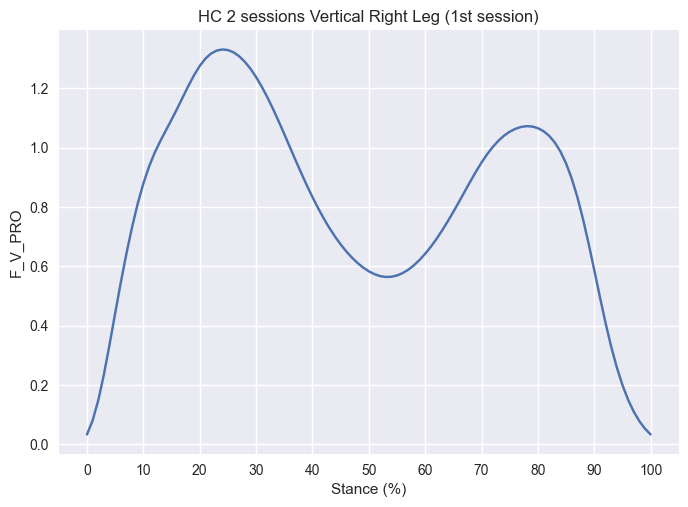

In [538]:
x_axis = [str(num) for num in range(101)]
y_values = HC_2_sessions_vertical_right.iloc[1:, 3:].values.flatten().tolist()

# Plot
plt.plot(x_axis, y_values)

# Set the axis labels and title
plt.xlabel('Stance (%)')
plt.ylabel('F_V_PRO')
plt.title('HC 2 sessions Vertical Right Leg (1st session)')

# Set the x-axis tick locations and labels
x_ticks = range(0, len(x_axis), 10)
x_tick_labels = [x_axis[i] for i in x_ticks]
plt.xticks(x_ticks, x_tick_labels)

# Show the plot
plt.show()


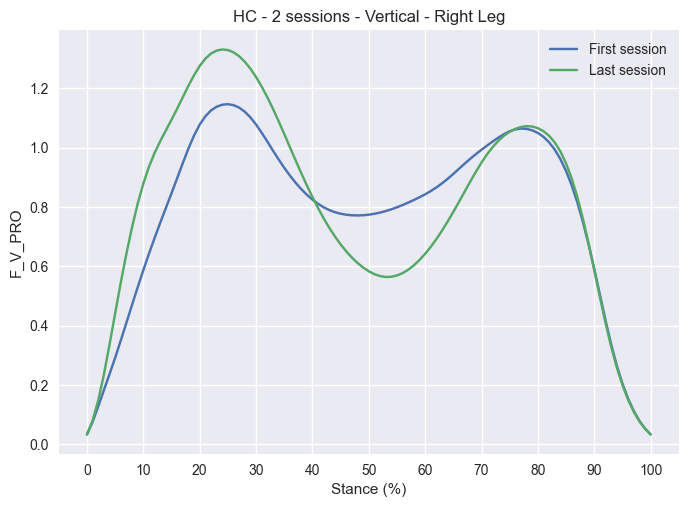

In [545]:
# Get the rows from HC_2_sessions_vertical_right DataFrame
rows = HC_2_sessions_vertical_right.iloc[:, 3:].values

# stance (%)
x_axis = [str(num) for num in range(101)]

# Get the number of sessions
num_sessions = rows.shape[0]

# Iterate over the rows and plot each one
for i, row in enumerate(rows):
    if i == 0:
        label = "First session"
    elif i == num_sessions - 1:
        label = "Last session"
    else:
        session_num = i
        label = f"Session {session_num}"
    plt.plot(x_axis, row, label=label)

# Set the axis labels and title
plt.xlabel('Stance (%)') 
plt.ylabel('F_V_PRO')
plt.title('HC - 2 sessions - Vertical - Right Leg')

# Set the x-axis tick locations and labels
x_ticks = range(0, len(x_axis), 10)
x_tick_labels = [x_axis[i] for i in x_ticks]
plt.xticks(x_ticks, x_tick_labels)

# Add a legend
plt.legend()

# Show the plot
plt.show()

### 2 sessions


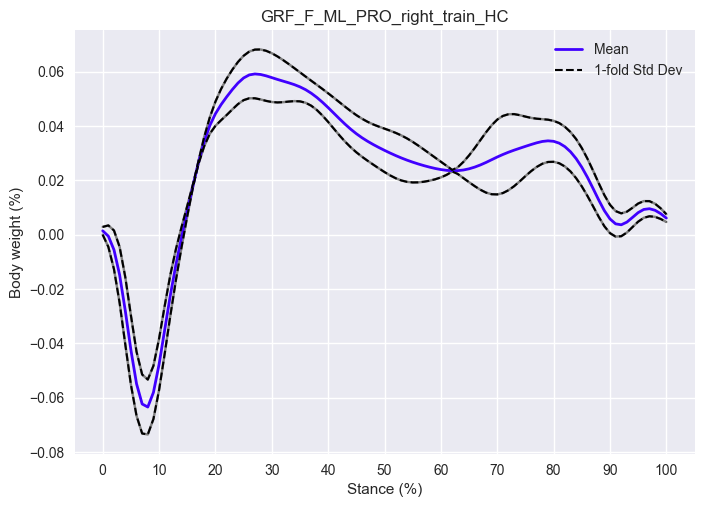

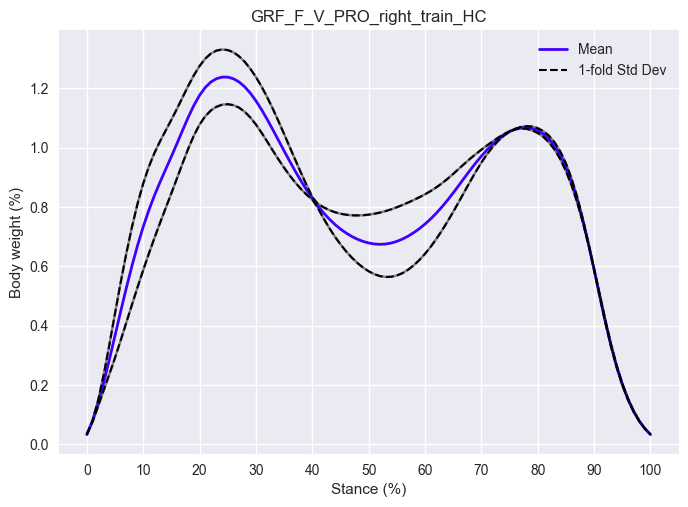

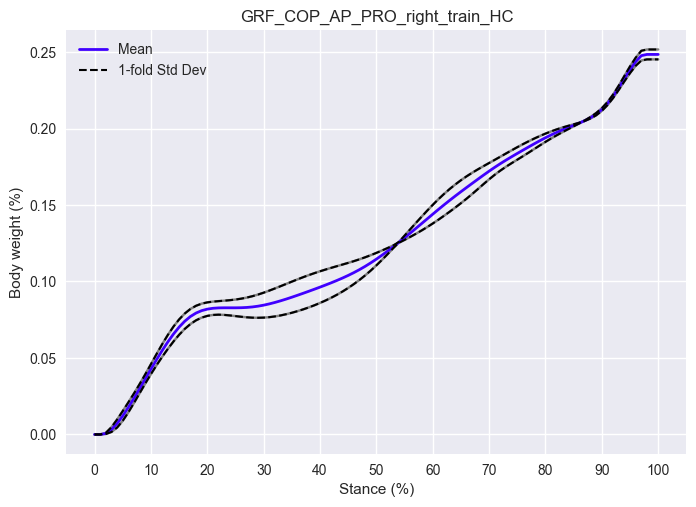

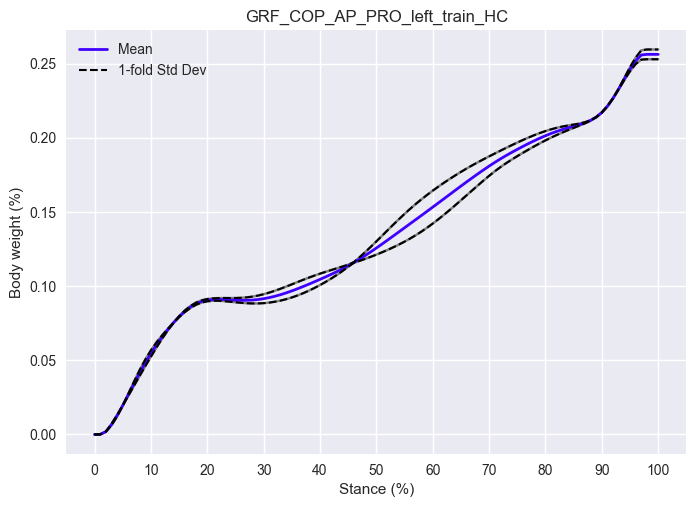

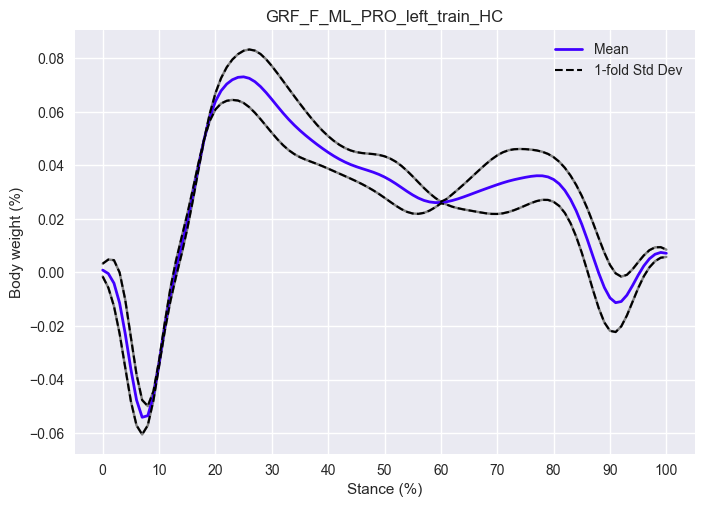

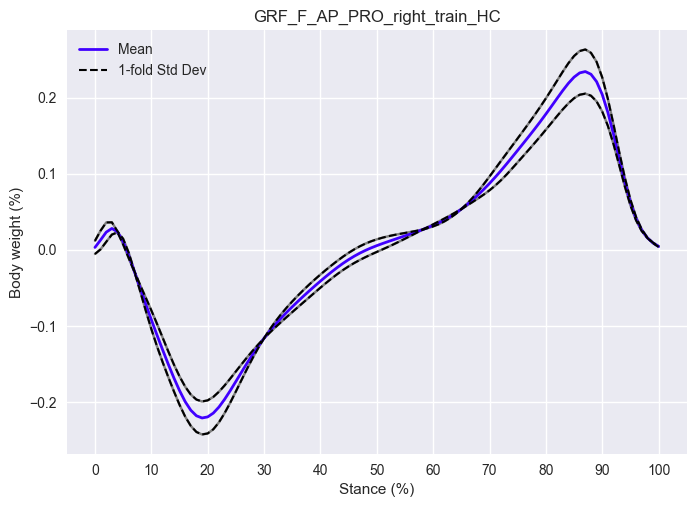

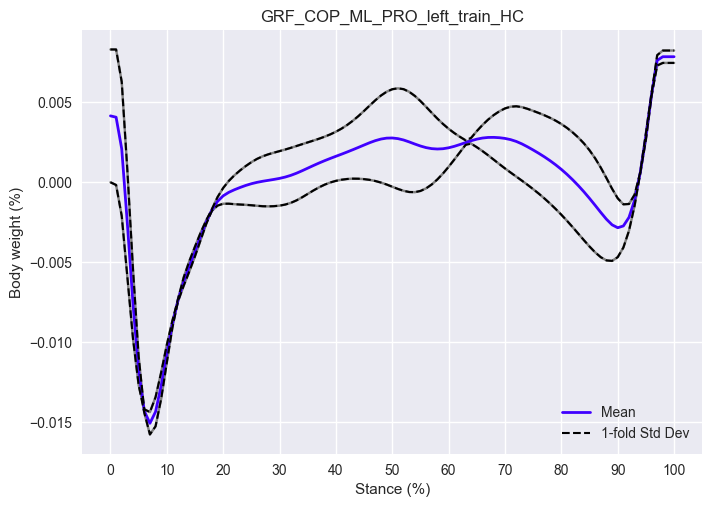

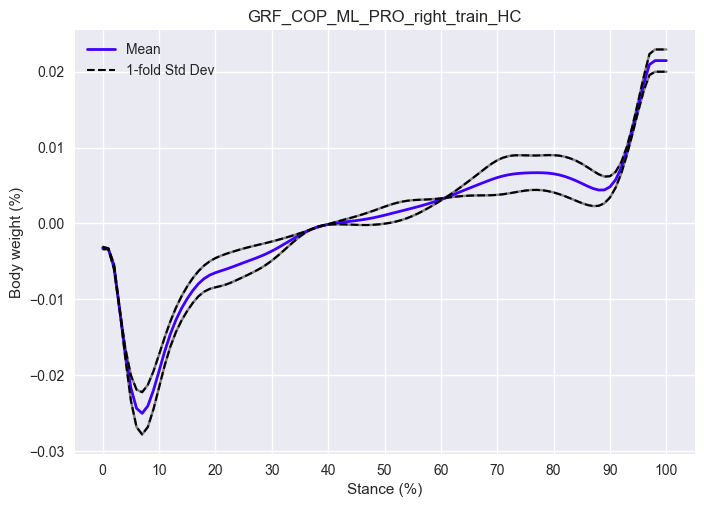

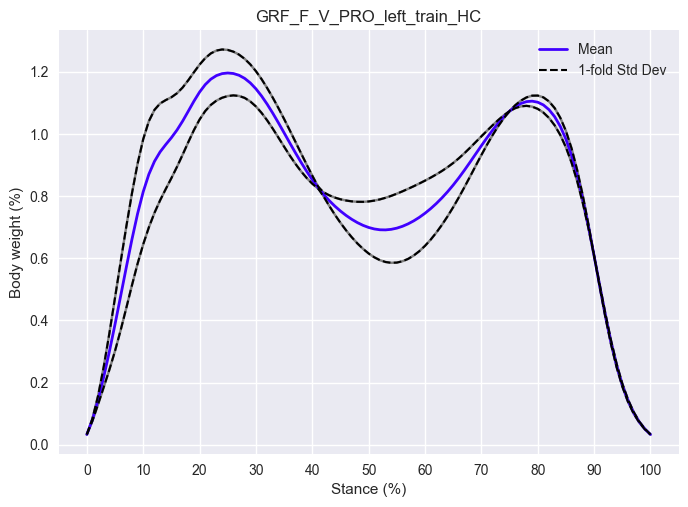

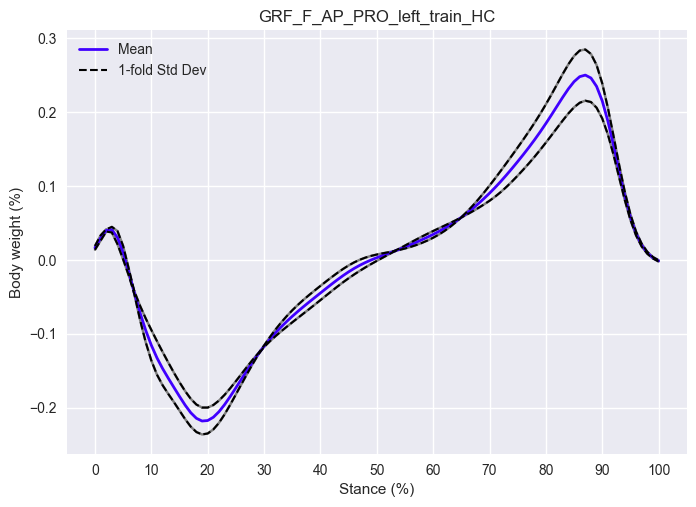

In [839]:
# HC - 2 sessions
plot_group_sessions(group='HC', num_sessions = 2)

### 3 sessions

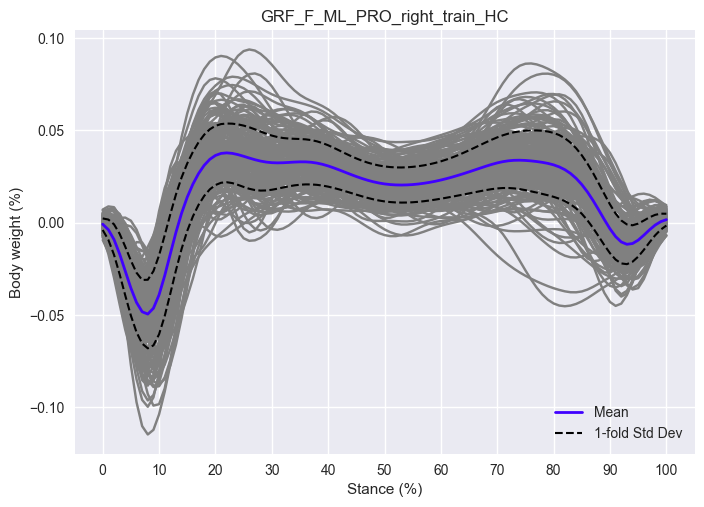

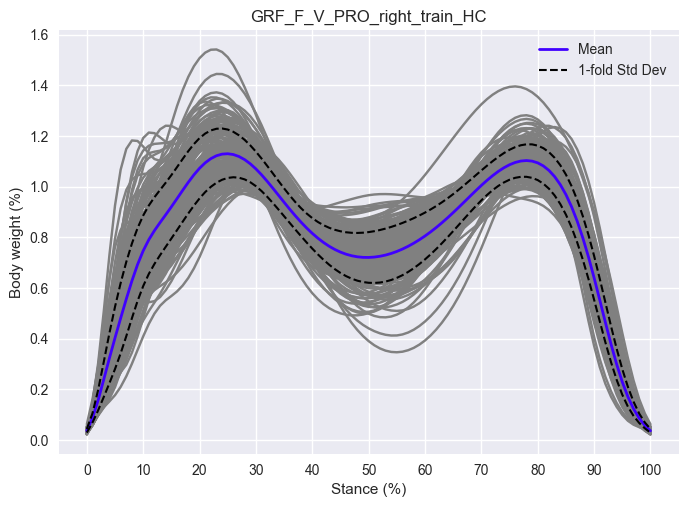

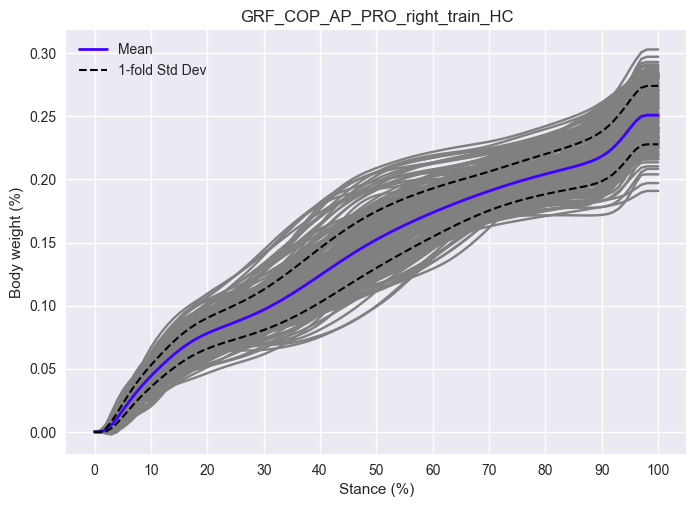

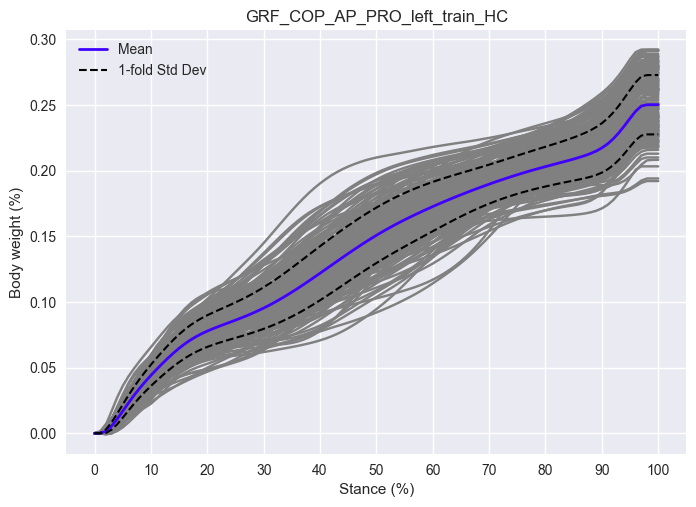

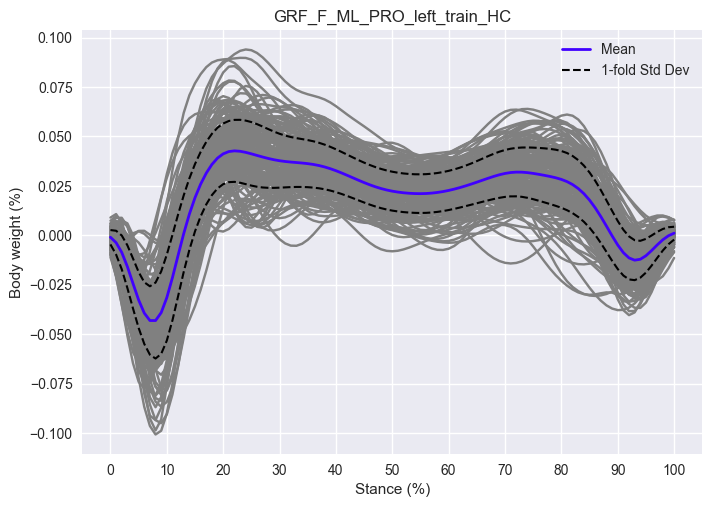

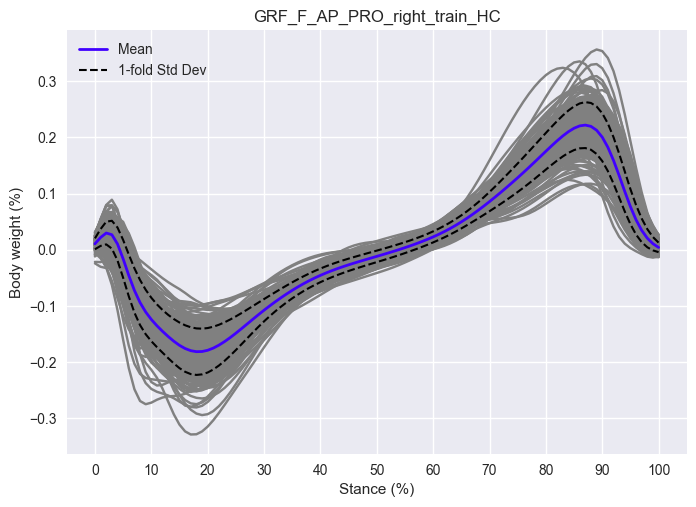

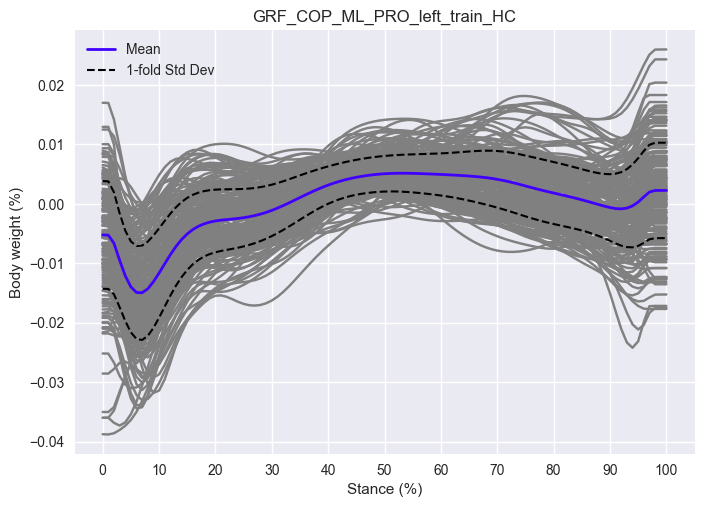

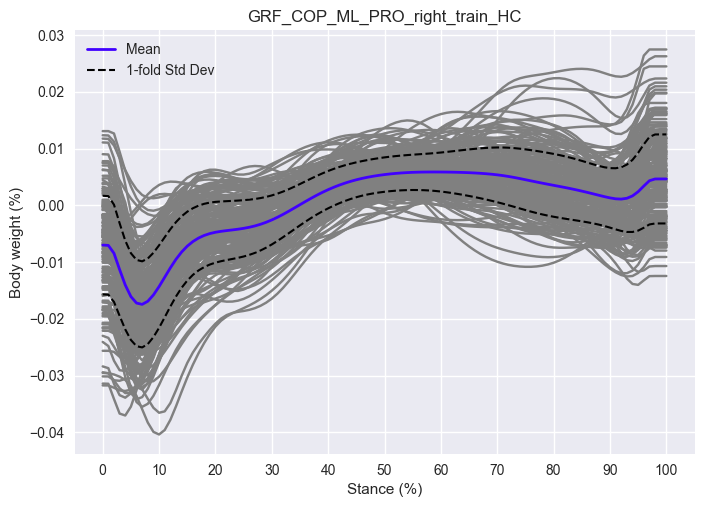

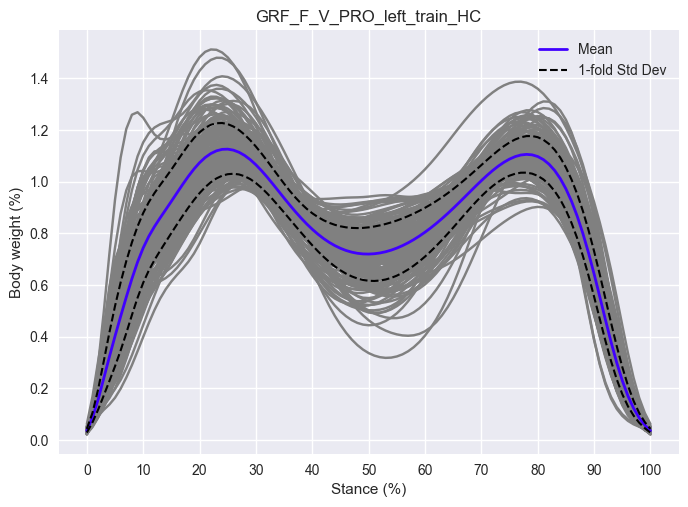

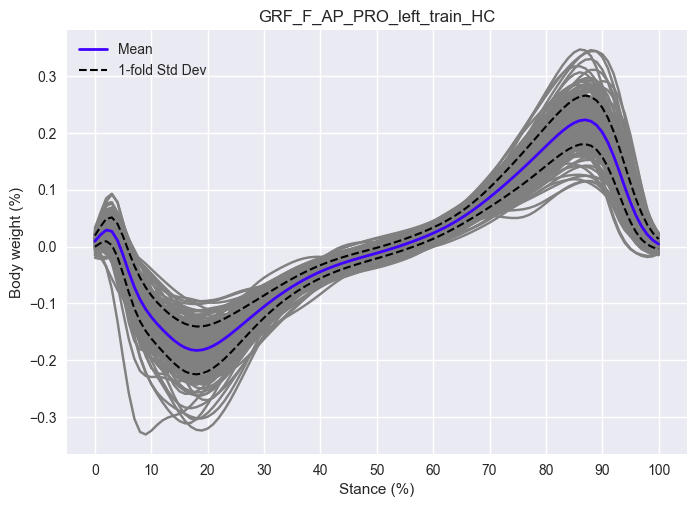

In [836]:
# HC - 3 sessions
plot_group_sessions(group='HC', num_sessions = 3)

### 4 sessions


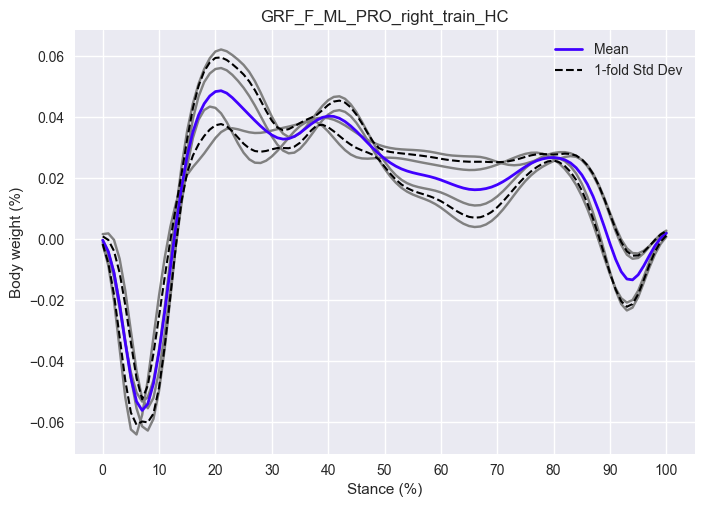

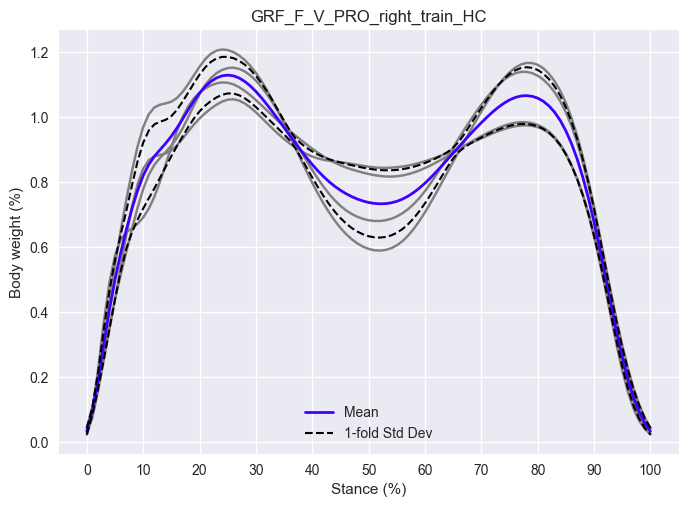

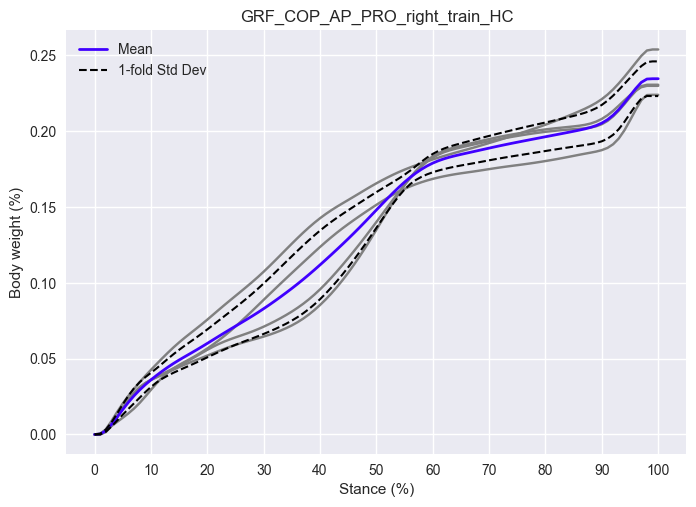

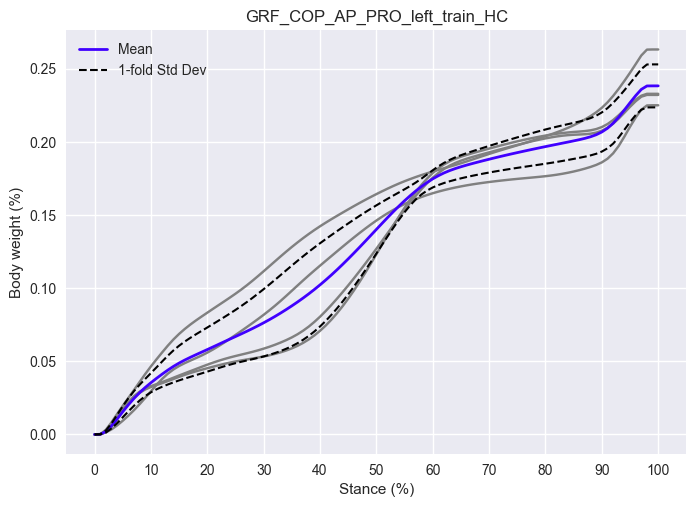

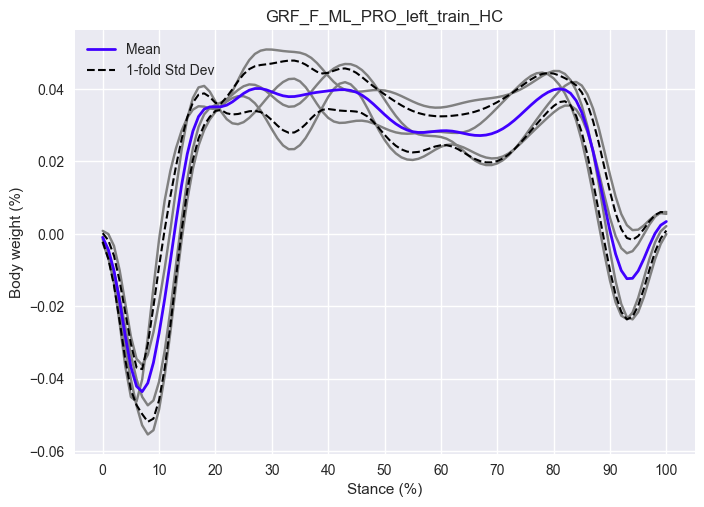

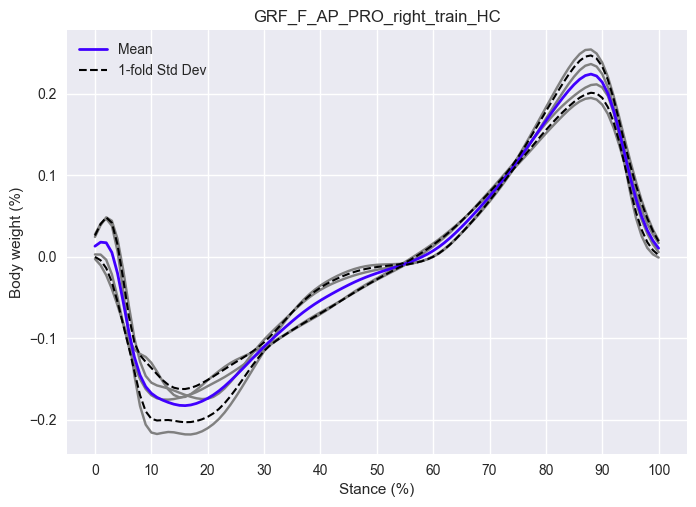

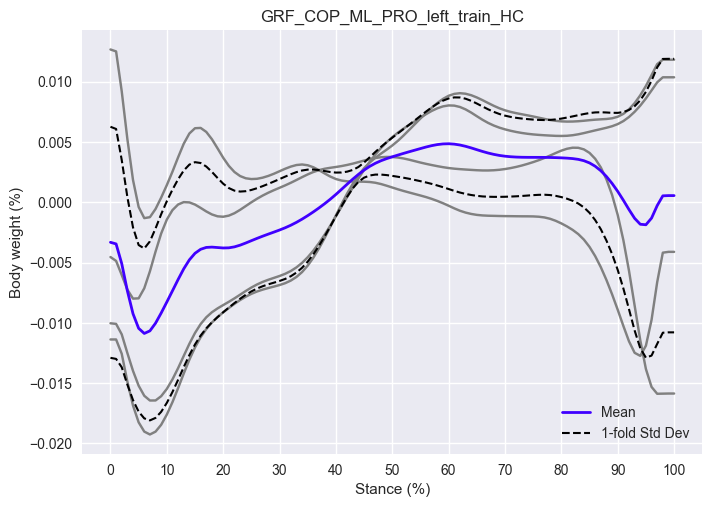

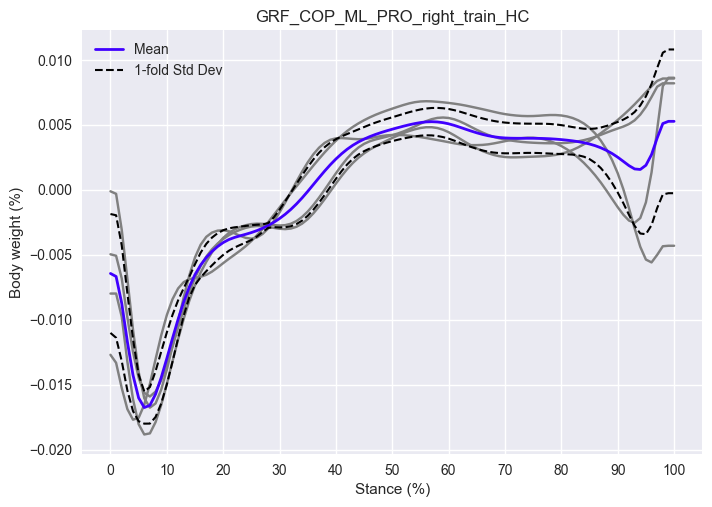

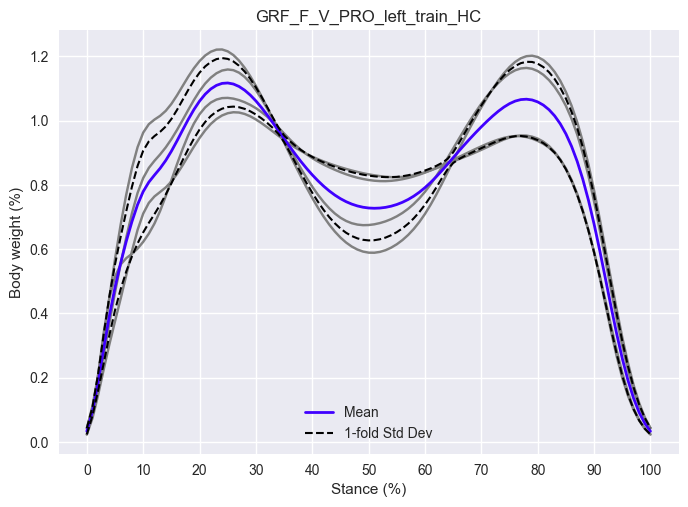

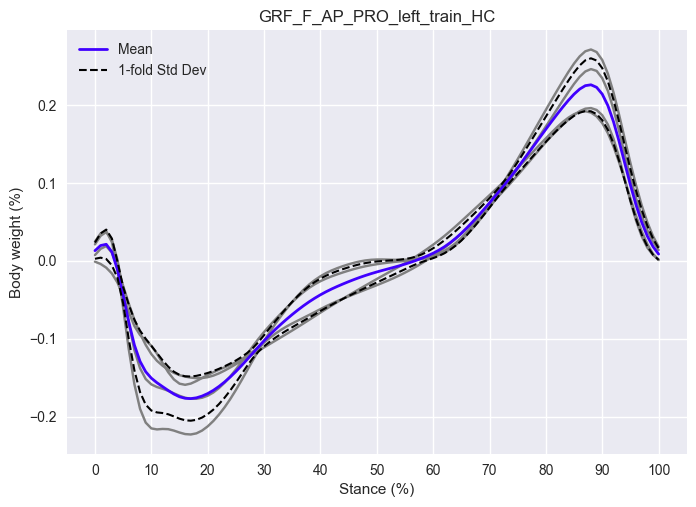

In [837]:
# HC - 4 sessions
plot_group_sessions(group='HC', num_sessions = 4)

## Plot group 1st session mean + group last session mean + HC mean

In [73]:
def plot_session_data(df, csv_filename, first_session_mean, last_session_mean):
    # Get the rows from the DataFrame
    rows = df.iloc[:, 3:].values
    # Stance (%)
    x_axis = [str(num) for num in range(101)]
    # Number of sessions
    num_sessions = rows.shape[0]

    # Set font size for title, labels, and legend
    title_fontsize = 16
    label_fontsize = 14
    legend_fontsize = 14

    # Plot mean line for the first session
    plt.plot(x_axis, 
             first_session_mean, 
             color='green', 
             label='First Session Mean',
             linewidth=2,
             zorder=3 # to achieve the desired visibility of the line.
             )

    # Plot mean line for the last session
    plt.plot(x_axis, 
             last_session_mean, 
             color='blue', 
             label='Last Session Mean',
             linewidth=2,
             zorder=3 # to achieve the desired visibility of the line.
             )

    # line 
    plt.axhline(y=0, color='grey', linestyle='dashed', linewidth=1)

    plt.xlabel('Stance Phase (%)', fontsize=label_fontsize)
    plt.ylabel('Anterior-Posterior GRF (% BW)', fontsize=label_fontsize)
    plt.title(csv_filename, fontsize=title_fontsize)

    x_ticks = range(0, len(x_axis), 10)
    x_tick_labels = [x_axis[i] for i in x_ticks]
    plt.xticks(x_ticks, x_tick_labels)

    # Add legend for mean and standard deviation
    plt.legend(loc='best', fontsize = legend_fontsize)

    plt.show()

    
def plot_group_data_with_HC_mean(group:str, num_sessions: int = 2):
    # Session folder
    session_folder = os.path.join(GROUPS_SESSIONS_DATA_TRAIN, f'groups_{num_sessions}sessions_data_train')

    # Group folders
    hc_folder = os.path.join(session_folder, 'HC_data')
    group_folder = os.path.join(session_folder, f'{group}_data')

    # stance (%)
    x_axis = [str(num) for num in range(101)]

    # Dictionary to store HC mean lines per common CSV filename
    hc_means = {}

    # Iterate over the CSV files in the HC folder
    for hc_filename in os.listdir(hc_folder):
        if hc_filename.endswith(".csv"):
            # HC file path
            hc_filepath = os.path.join(hc_folder, hc_filename)
            # Read the HC CSV file
            hc_df = pd.read_csv(hc_filepath)
            # Extract common filename part
            common_filename = hc_filename.split("_train_")[0]
            # Calculate mean line of HC and store it in the dictionary
            hc_means[common_filename] = np.mean(hc_df.iloc[:, 3:].values, axis=0)

    # Iterate over the common filenames with available HC mean lines
    for common_filename in hc_means.keys():
        # Check if the group plot is available for the current common filename
        if os.path.exists(os.path.join(group_folder, f"{common_filename}_train_{group}.csv")):
            # Read the corresponding group CSV file
            group_df = pd.read_csv(os.path.join(group_folder, f"{common_filename}_train_{group}.csv"))

            # Calculate the mean lines for the first session and last session of all patients
            first_session_mean = group_df.groupby('SUBJECT_ID').first().iloc[:, 2:].mean(axis=0)
            last_session_mean = group_df.groupby('SUBJECT_ID').last().iloc[:, 2:].mean(axis=0)

            # Plot HC mean line on the same plot
            plt.plot(x_axis, hc_means[common_filename], 
            color='red', 
            label='HC Mean', 
            linewidth=2, 
            zorder=3 # to achieve the desired visibility of the line.
            )
        
            # Plot mean lines for the first session, last session, and HC data
            plot_session_data(df=group_df, csv_filename=common_filename,
                            first_session_mean=first_session_mean,
                            last_session_mean=last_session_mean)

## ANKLE

Visualizamos y comparamos los promedios de la primera y última sesión de pacientes con deficiencias musculoesqueléticas en el tobillo sometidos a 2 sesiones de rehabilitación en relación con los promedios de los controles sanos (HC). Esta visualización nos ayudará a identificar tendencias y patrones significativos en la evolución del peso corporal durante la fase de apoyo en diferentes sesiones de terapia. Para analizar los datos de las sesiones y obtener promedios representativos para cada sesión, se utilizó un proceso de visualización que involucra la creación de gráficos de líneas que representan la evolución de los promedios de peso corporal durante la fase de apoyo (% de la fase de apoyo o stance) en las sesiones de terapia.

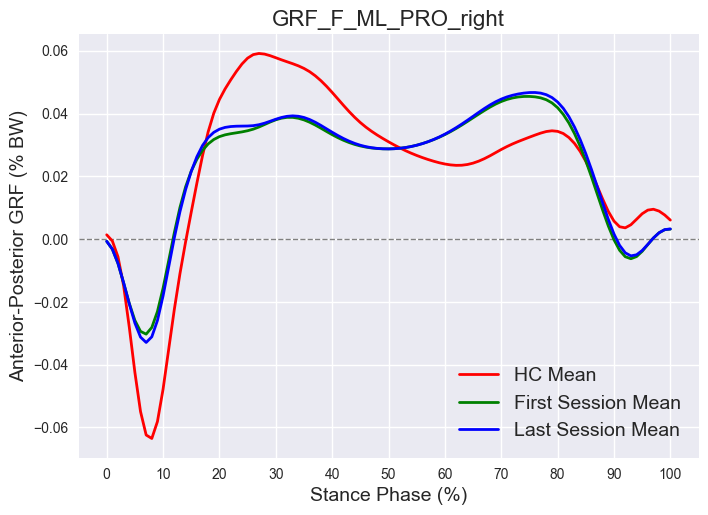

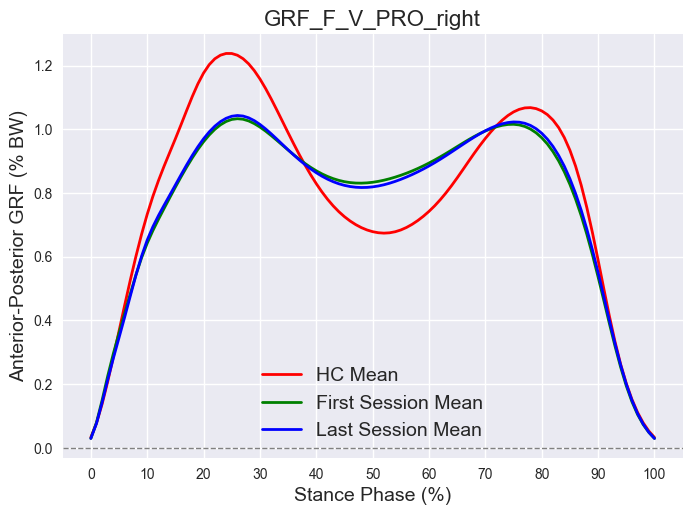

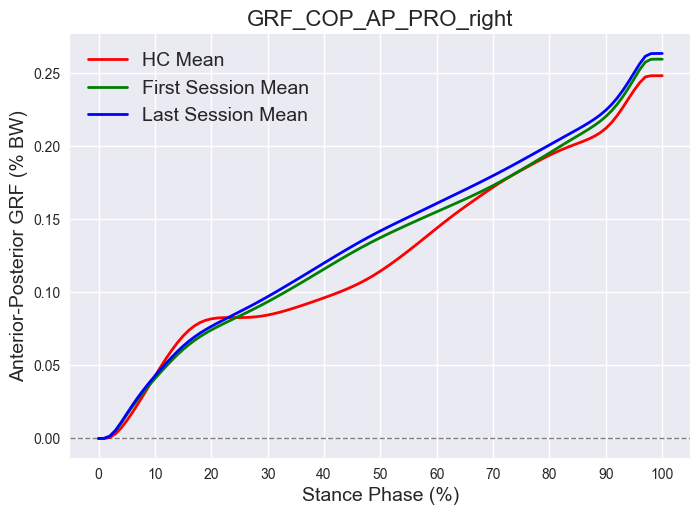

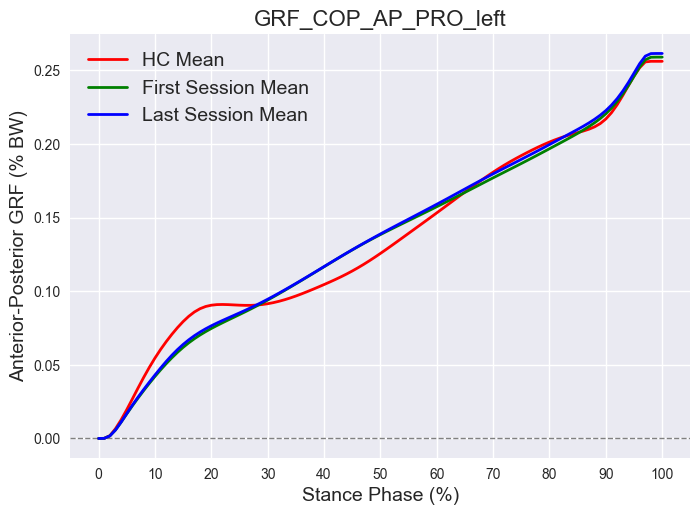

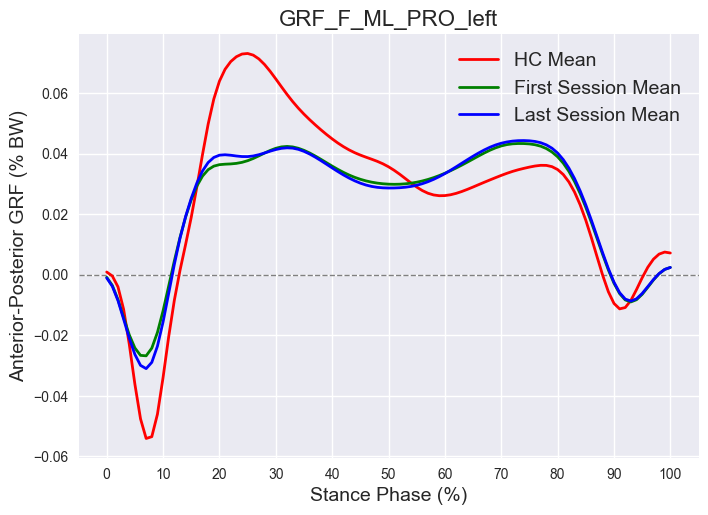

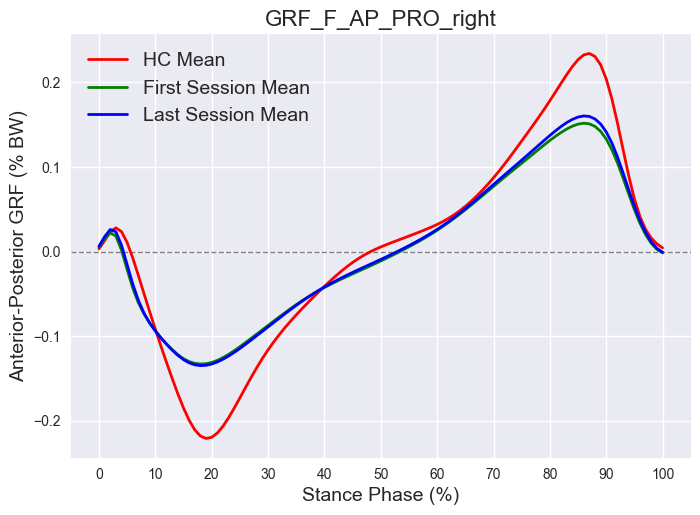

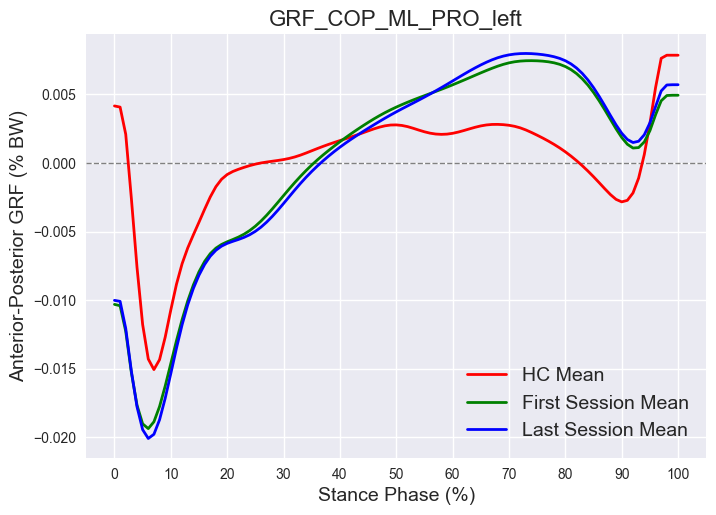

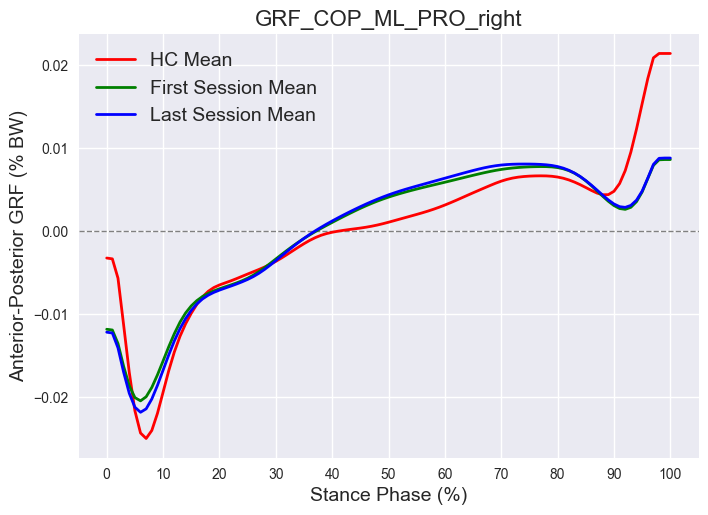

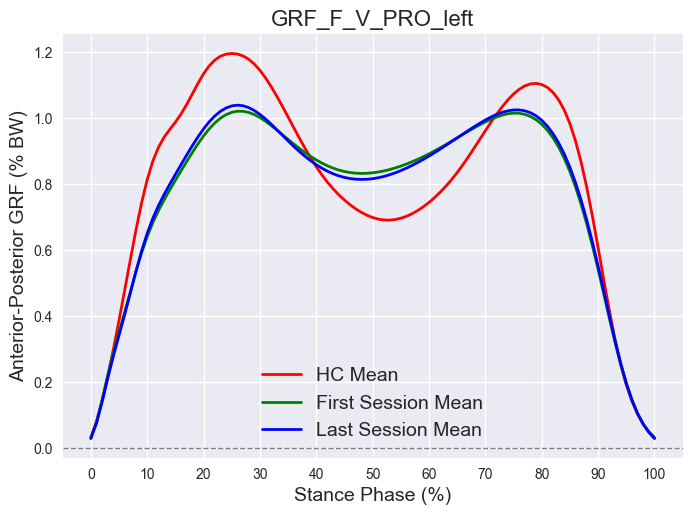

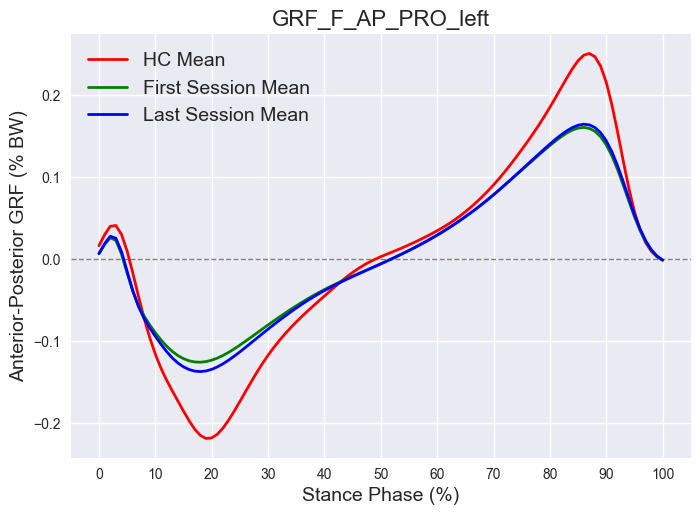

In [74]:
plot_group_data_with_HC_mean(group = 'A', num_sessions = 2)

## Selección de CSV para el modelo



Para empezar, probamos con el GRF_F_AP_PRO (nos podemos enfocar en el máximo y el mínimo, son gráficas más agradecidas):
-	Anterior-posterior GRF. 
-	Post-processed breaking and propulsive shear force. 
-	Unidad: multiple of body weight. 

Para realizar una mayor acotación en nuestro estudio, focalizamos nuestra atención en una variable concreta. En este sentido, decidimos centrarnos en la fuerza de reacción del suelo en dirección anterior-posterior (fuerza de cizallamiento de frenado y propulsión), es decir, los archivos "GRF_F_AP_PRO_right_train_A.csv" y "GRF_F_AP_PRO_left_train_A.csv". Una de las razones clave detrás de esta elección fue la naturaleza de las líneas promedio de la primera y última sesión de rehabilitación, que representan la evolución del promedio del peso corporal durante la fase de apoyo (porcentaje de la fase de apoyo o stance) en las sesiones de terapia.  Estas líneas claramente exhiben un punto mínimo y uno máximo distintivos. Al centrarnos en estos valores extremos, logramos gráficos más comprensibles y con resultados visiblemente notorios. 

In [278]:
def copy_csv_files_to_new_directory(set: str = 'train', 
                                    csv_filename: str = 'GRF_F_AP_PRO', 
                                    destination_folder: str = GRF_F_AP_PRO_DATA_TRAIN,
                                    min_sessions: int = 2,
                                    max_sessions: int = 4):
    if set == 'train':
        metadata_df = pd.read_csv(UNBALANCED_TRAIN_SET_METADATA_PATH)
        source_folder = GROUPS_SESSIONS_DATA_TRAIN
        destination_folder = destination_folder
    elif set == 'test':
        metadata_df = pd.read_csv(UNBALANCED_TRAIN_SET_METADATA_PATH)
        source_folder = GROUPS_SESSIONS_DATA_TEST
        destination_folder = destination_folder
    else:
        raise ValueError("Invalid 'set' parameter value. Must be 'train' or 'test'.")

    # Create separate folders for patients with the specified range of sessions
    for num_sessions in range(min_sessions, max_sessions + 1):
        session_folder_name = f"groups_{num_sessions}sessions_data_{set}"
        session_folder_path = os.path.join(source_folder, session_folder_name)
        new_session_folder_path = os.path.join(destination_folder, session_folder_name)
        # exist_ok=True to create the destination folders if they don't exist
        os.makedirs(new_session_folder_path, exist_ok=True)
        
        # Iterate over each group
        groups = metadata_df['CLASS_LABEL'].unique().tolist()
        for group in groups:
            group_folder_name = f"{group}_data"
            group_folder_path = os.path.join(session_folder_path, group_folder_name)
            new_group_folder_path = os.path.join(new_session_folder_path, group_folder_name)
            # exist_ok=True to create the destination folders if they don't exist
            os.makedirs(new_group_folder_path, exist_ok=True)

            # Iterate over each CSV file in the group folder
            for filename in os.listdir(group_folder_path):
                if filename.startswith(csv_filename) and filename.endswith(".csv"):
                    source_file_path = os.path.join(group_folder_path, filename)
                    destination_file_path = os.path.join(new_group_folder_path, filename)
                    shutil.copy(source_file_path, destination_file_path)

In [112]:
# train set: GRF_F_AP_PRO
copy_csv_files_to_new_directory(set = 'train', 
                                csv_filename = 'GRF_F_AP_PRO', 
                                destination_folder = GRF_F_AP_PRO_DATA_TRAIN,
                                min_sessions = 2,
                                max_sessions = 4)

## Unir ambas extremidades inferiores en un único dataset

-	Consideramos que cada pierna es una observación diferente, como si tuviéramos una nueva medida. Lo interpretamos como otro paciente. La idea de ahora es hacer un dataset sencillo dónde tengo la primera sesión por paciente y pierna, cada pierna es como un paciente diferente, y como hay una variación, al final tenemos más datos. Esto es para hacer una prueba inicial. 

-	Hacemos una suposición: consideramos que son medidas independientes, por tanto, no importa si ponemos los valores de pierna derecha e izquierda por este orden o si juntamos el dataset de la pierna izquierda debajo del dataset de la pierna derecha: RLRLRL = RRRLLL. En este caso, seguimos el siguiente patrón: RRRLLL. 


Ponemos la pierna derecha e izquierda en el mismo dataset. 

**Primera aproximación**

In [192]:
right_file = "GRF_F_AP_PRO_right_train_A.csv"
left_file = "GRF_F_AP_PRO_left_train_A.csv"
output_file = "GRF_F_AP_PRO_right_left_train_A.csv"

# Read the right and left CSV files
right_data = pd.read_csv(os.path.join(GRF_F_AP_PRO_DATA_TRAIN, 
                              'groups_2sessions_data_train/A_data/'+right_file))
left_data = pd.read_csv(os.path.join(GRF_F_AP_PRO_DATA_TRAIN, 
                              'groups_2sessions_data_train/A_data/'+left_file))

# Concatenate the data vertically
combined_data = pd.concat([right_data, left_data], axis=0)
# Reset the index
combined_data = combined_data.reset_index(drop=True)

combined_data

SUBJECT_ID  SESSION_ID  TRIAL_ID  F_AP_PRO_1  F_AP_PRO_2  F_AP_PRO_3  \
0          1746       11976  5.500000   -0.004533   -0.000129    0.005483   
1          1746       12037  5.625000   -0.006869   -0.000890    0.008038   
2          1748       18454  5.166667    0.009228    0.018207    0.020520   
3          1748       18518  6.333333    0.016802    0.027338    0.030654   
4          1751       34346  4.666667    0.008917    0.019561    0.026497   
..          ...         ...       ...         ...         ...         ...   
355        2376       15333  5.888889    0.016205    0.034184    0.044875   
356        2378       22412  5.500000    0.025581    0.043517    0.052150   
357        2378       22573  5.666667    0.026262    0.042529    0.048929   
358        2388       18359  5.500000   -0.006285   -0.010654   -0.015386   
359        2388       18415  5.750000   -0.006720   -0.009980   -0.011938   

     F_AP_PRO_4  F_AP_PRO_5  F_AP_PRO_6  F_AP_PRO_7  ...  F_AP_PRO_92  \
0      0.003821   -0.008103   -0.025409   -0.043892  ...     0.138415   
1      0.011478    0.004346   -0.011274   -0.031441  ...     0.150356   
2      0.009092   -0.014986   -0.041766   -0.062416  ...     0.118068   
3      0.021135   -0.001506   -0.029649   -0.053990  ...     0.078602   
4      0.022526    0.007073   -0.015679   -0.040577  ...     0.187439   
..          ...         ...         ...         ...  ...          ...   
355    0.039438    0.021248    0.002173   -0.009678  ...     0.134612   
356    0.037953    0.001859   -0.043780   -0.083959  ...     0.198142   
357    0.032363   -0.004806   -0.051497   -0.093096  ...     0.226628   
358   -0.020114   -0.025592   -0.033389   -0.042880  ...     0.088572   
359   -0.012060   -0.012532   -0.016834   -0.025817  ...     0.096041   

     F_AP_PRO_93  F_AP_PRO_94  F_AP_PRO_95  F_AP_PRO_96  F_AP_PRO_97  \
0       0.115237     0.091950     0.069681     0.049360     0.031920   
1       0.125413     0.100498     0.076889     0.055665     0.037796   
2       0.109534     0.097488     0.081554     0.063031     0.044676   
3       0.073529     0.066233     0.056173     0.043774     0.030571   
4       0.158961     0.127539     0.097307     0.071881     0.052150   
..           ...          ...          ...          ...          ...   
355     0.119336     0.101747     0.082561     0.062911     0.044298   
356     0.171729     0.143329     0.115157     0.088902     0.066091   
357     0.199161     0.168945     0.138394     0.109574     0.083829   
358     0.081463     0.072986     0.063061     0.051855     0.039758   
359     0.087146     0.077028     0.065525     0.052665     0.039007   

     F_AP_PRO_98  F_AP_PRO_99  F_AP_PRO_100  F_AP_PRO_101  
0       0.018096     0.007602     -0.000017     -0.004173  
1       0.023901     0.013749      0.006494      0.001724  
2       0.029247     0.017662      0.009402      0.003762  
3       0.018634     0.009330      0.002944     -0.000842  
4       0.037216     0.025276      0.014959      0.006287  
..           ...          ...           ...           ...  
355     0.027876     0.014317      0.004201     -0.001975  
356     0.046742     0.030714      0.017591      0.006859  
357     0.061190     0.041332      0.024417      0.010504  
358     0.027561     0.016407      0.007435      0.001441  
359     0.025623     0.013818      0.004765     -0.000867  

[360 rows x 104 columns]

**Función**

In [279]:
def combine_right_left_legs_csv(set: str = 'train', 
                                source_folder: str = GRF_F_AP_PRO_DATA_TRAIN, 
                                min_sessions: int = 2,
                                max_sessions: int = 4):
    if set == 'train':
        metadata_df = pd.read_csv(UNBALANCED_TRAIN_SET_METADATA_PATH)
        source_folder = source_folder
    elif set == 'test':
        metadata_df = pd.read_csv(UNBALANCED_TRAIN_SET_METADATA_PATH)
        source_folder = source_folder
    else:
        raise ValueError("Invalid 'set' parameter value. Must be 'train' or 'test'.")
    
    # Create separate folders for patients with the specified range of sessions
    for num_sessions in range(min_sessions, max_sessions + 1):
        session_folder_name = f"groups_{num_sessions}sessions_data_{set}"
        session_folder_path = os.path.join(source_folder, session_folder_name)

        # Iterate over each group
        groups = metadata_df['CLASS_LABEL'].unique().tolist()
        for group in groups:
            group_folder_name = f"{group}_data"
            group_folder_path = os.path.join(session_folder_path, group_folder_name)

            # DataFrames to store the combined right and left leg data
            combined_data = None

            # Iterate over each CSV file in the group folder
            for filename in os.listdir(group_folder_path):
                if "right" in filename and filename.endswith(".csv"):
                    right_leg_file = os.path.join(group_folder_path, filename)
                elif "left" in filename and filename.endswith(".csv"):
                    left_leg_file = os.path.join(group_folder_path, filename)

            # Read the right leg CSV file into a DataFrame
            if right_leg_file is not None:
                right_leg_df = pd.read_csv(right_leg_file)
            else:
                # Handle the case when the right leg file is not found
                print("Right leg file not found.")

            # Read the left leg CSV file into a DataFrame
            if left_leg_file is not None:
                left_leg_df = pd.read_csv(left_leg_file)
            else:
                # Handle the case when the left leg file is not found
                print("Left leg file not found.")

            # Combine the right and left leg DataFrames
            if right_leg_df is not None and left_leg_df is not None:
                combined_data = pd.concat([right_leg_df, left_leg_df], axis=0)
            else:
                # Handle the case when either the right or left leg DataFrame is missing
                print("Failed to combine the DataFrames. One or both leg files are missing.")

            # Save the combined data as a new CSV file in the group folder
            if combined_data is not None:
                combined_file_path = os.path.join(group_folder_path, "combined.csv")
                combined_data.to_csv(combined_file_path, index=False)
                #print(f"Combined CSV file saved: {combined_file_path}")
            else:
                # Handle the case when the combined DataFrame is missing
                print("Combined DataFrame is missing.")

In [194]:
combine_right_left_legs_csv(set = 'train', 
                            source_folder = GRF_F_AP_PRO_DATA_TRAIN, 
                            min_sessions = 2,
                            max_sessions = 4)

Combined CSV file saved: ./gaitrec_data/GRF_F_AP_PRO_data_train/groups_2sessions_data_train/HC_data/combined.csv
Combined CSV file saved: ./gaitrec_data/GRF_F_AP_PRO_data_train/groups_2sessions_data_train/C_data/combined.csv
Combined CSV file saved: ./gaitrec_data/GRF_F_AP_PRO_data_train/groups_2sessions_data_train/H_data/combined.csv
Combined CSV file saved: ./gaitrec_data/GRF_F_AP_PRO_data_train/groups_2sessions_data_train/K_data/combined.csv
Combined CSV file saved: ./gaitrec_data/GRF_F_AP_PRO_data_train/groups_2sessions_data_train/A_data/combined.csv
Combined CSV file saved: ./gaitrec_data/GRF_F_AP_PRO_data_train/groups_3sessions_data_train/HC_data/combined.csv
Combined CSV file saved: ./gaitrec_data/GRF_F_AP_PRO_data_train/groups_3sessions_data_train/C_data/combined.csv
Combined CSV file saved: ./gaitrec_data/GRF_F_AP_PRO_data_train/groups_3sessions_data_train/H_data/combined.csv
Combined CSV file saved: ./gaitrec_data/GRF_F_AP_PRO_data_train/groups_3sessions_data_train/K_data/com

**Comprobación (manual vs función)**

In [195]:
#### ANKLE 

# MANUAL
right_file = "GRF_F_AP_PRO_right_train_A.csv"
left_file = "GRF_F_AP_PRO_left_train_A.csv"
output_file = "GRF_F_AP_PRO_right_left_train_A.csv"
# Read the right and left CSV files
right_data = pd.read_csv(os.path.join(GRF_F_AP_PRO_DATA_TRAIN, 
                              'groups_2sessions_data_train/A_data/'+right_file))
left_data = pd.read_csv(os.path.join(GRF_F_AP_PRO_DATA_TRAIN, 
                              'groups_2sessions_data_train/A_data/'+left_file))
# Concatenate the data vertically
combined_data_A = pd.concat([right_data, left_data], axis=0)
# Reset the index
combined_data_A = combined_data_A.reset_index(drop=True)


# DE LA FUNCIÓN 
df_A = pd.read_csv(os.path.join(GRF_F_AP_PRO_DATA_TRAIN, 
                              'groups_2sessions_data_train/A_data/combined.csv'))


(df_A == combined_data_A).all().all()

True

In [196]:
#### HC 
# MANUAL
right_file = "GRF_F_AP_PRO_right_train_HC.csv"
left_file = "GRF_F_AP_PRO_left_train_HC.csv"
output_file = "GRF_F_AP_PRO_right_left_train_HC.csv"
# Read the right and left CSV files
right_data = pd.read_csv(os.path.join(GRF_F_AP_PRO_DATA_TRAIN, 
                              'groups_2sessions_data_train/HC_data/'+right_file))
left_data = pd.read_csv(os.path.join(GRF_F_AP_PRO_DATA_TRAIN, 
                              'groups_2sessions_data_train/HC_data/'+left_file))
# Concatenate the data vertically
combined_data_HC = pd.concat([right_data, left_data], axis=0)
# Reset the index
combined_data_HC = combined_data_HC.reset_index(drop=True)

# DE LA FUNCIÓN 
df_HC = pd.read_csv(os.path.join(GRF_F_AP_PRO_DATA_TRAIN, 
                              'groups_2sessions_data_train/HC_data/combined.csv'))


(df_HC == combined_data_HC).all().all()

True

In [197]:
#### C 
# MANUAL
right_file = "GRF_F_AP_PRO_right_train_C.csv"
left_file = "GRF_F_AP_PRO_left_train_C.csv"
output_file = "GRF_F_AP_PRO_right_left_train_C.csv"
# Read the right and left CSV files
right_data = pd.read_csv(os.path.join(GRF_F_AP_PRO_DATA_TRAIN, 
                              'groups_3sessions_data_train/C_data/'+right_file))
left_data = pd.read_csv(os.path.join(GRF_F_AP_PRO_DATA_TRAIN, 
                              'groups_3sessions_data_train/C_data/'+left_file))
# Concatenate the data vertically
combined_data_C = pd.concat([right_data, left_data], axis=0)
# Reset the index
combined_data_C = combined_data_C.reset_index(drop=True)

# DE LA FUNCIÓN 
df_C = pd.read_csv(os.path.join(GRF_F_AP_PRO_DATA_TRAIN, 
                              'groups_3sessions_data_train/C_data/combined.csv'))


(df_C == combined_data_C).all().all()

True

## Full preprocessing pipeline


Encapsulamos todos los pasos preprocesamiento y feature engineering anteriores en funciones. De esta manera, podremos aplicar todo el preprocesamiento de los datos al train set y test set por separado y de una manera más eficaz.

Cómo el programa que estamos escribiendo se centra más en el flujo de información, como el procesamiento de datos en secuencia, entonces el uso de un enfoque más funcional va a ser mejor y también va a hacer que sea más fácil escribir tests para él.


In [299]:
#### 1. Agrupar por grupo y número de sesiones

# Include the subjects with a specified number of sessions and the desired group
def filter_by_sessions_and_group(df, 
                                 session_counts, 
                                 metadata_df, 
                                 num_sessions, 
                                 group) -> pd.DataFrame:
    # Filter the dataframe to include only the subjects with the specified number of sessions
    selected_subjects = session_counts[session_counts == num_sessions].index
    filtered_df = df[df['SUBJECT_ID'].isin(selected_subjects)]
    # Filter the dataframe to include only the subjects with the desired group
    group_subject_ids = metadata_df[metadata_df['CLASS_LABEL'] == group]['SUBJECT_ID'].unique()
    filtered_df = filtered_df[filtered_df['SUBJECT_ID'].isin(group_subject_ids)]
    return filtered_df

# Create a new filename by appending the group name to the original filename, and saves the filtered 
# dataframe to a new CSV file in the specified group folder path
def save_df_by_sessions_and_group(group_folder_path, 
                                  filename, 
                                  group, 
                                  filtered_df) -> None:
    # Create a new dataframe name by appending '_group' to the filename
    new_filename = os.path.splitext(filename)[0] + '_' + group + '.csv'
    new_filepath = os.path.join(group_folder_path, new_filename)
    # Save the filtered dataframe to the new CSV file
    filtered_df.to_csv(new_filepath, index=False)

# Main function
def create_group_session_folders(set: str = 'train', 
                                 min_sessions: int = 2, 
                                 max_sessions: int = 4) -> None:
    if set == 'train':
        # Load metadata of the train set
        metadata_df = pd.read_csv(UNBALANCED_TRAIN_SET_METADATA_PATH)
        # Calculate the number of unique sessions per subject
        session_counts = metadata_df.groupby('SUBJECT_ID')['SESSION_ID'].nunique()

        # Create separate folders for patients with 2, 3, or 4 sessions
        for num_sessions in range(min_sessions, max_sessions + 1):
            folder_name = f"groups_{num_sessions}sessions_data_train"
            folder_path = os.path.join(GROUPS_SESSIONS_DATA_TRAIN, folder_name)
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)

            # Iterate over each group
            groups = metadata_df['CLASS_LABEL'].unique().tolist() # ['HC', 'C', 'H', 'K', 'A']
            for group in groups: # ['HC', 'ANKLE', 'KNEE', 'CALCANEUS', 'HIP']
                group_folder_path = os.path.join(folder_path, f"{group}_data")
                if not os.path.exists(group_folder_path):
                    os.makedirs(group_folder_path)

                # Iterate over each CSV file in the postprocessed folder
                for filename in os.listdir(POSTPROCESSED_TRAIN_FOLDER):
                    if filename.endswith(".csv"):
                        # File path
                        filepath = os.path.join(POSTPROCESSED_TRAIN_FOLDER, filename)
                        # Read the CSV file
                        df = pd.read_csv(filepath)
                        # Include the subjects with a specified number of sessions and the desired group
                        filtered_df = filter_by_sessions_and_group(df, 
                                                                   session_counts, 
                                                                   metadata_df, 
                                                                   num_sessions, group)
                        # Create a new filename by appending the group name to the original filename, 
                        # and saves the filtered dataframe to a new CSV file in the specified group folder path
                        save_df_by_sessions_and_group(group_folder_path, filename, group, filtered_df)


    elif set == 'test':
        # Load metadata of the train set
        metadata_df = pd.read_csv(TEST_SET_METADATA_PATH)
        # Calculate the number of unique sessions per subject
        session_counts = metadata_df.groupby('SUBJECT_ID')['SESSION_ID'].nunique()

        # Create separate folders for patients with 2, 3, or 4 sessions
        for num_sessions in range(min_sessions, max_sessions + 1):
            folder_name = f"groups_{num_sessions}sessions_data_test"
            folder_path = os.path.join(GROUPS_SESSIONS_DATA_TEST, folder_name)
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)

            # Iterate over each group
            groups = metadata_df['CLASS_LABEL'].unique().tolist() # ['HC', 'C', 'H', 'K', 'A']
            for group in groups: # ['HC', 'ANKLE', 'KNEE', 'CALCANEUS', 'HIP']
                group_folder_path = os.path.join(folder_path, f"{group}_data")
                if not os.path.exists(group_folder_path):
                    os.makedirs(group_folder_path)

                # Iterate over each CSV file in the postprocessed folder
                for filename in os.listdir(TEST_FOLDER):
                    if filename.endswith(".csv"):
                        # File path
                        filepath = os.path.join(TEST_FOLDER, filename)
                        # Read the CSV file
                        df = pd.read_csv(filepath)
                        # Include the subjects with a specified number of sessions and the desired group
                        filtered_df = filter_by_sessions_and_group(df, 
                                                                   session_counts, 
                                                                   metadata_df, 
                                                                   num_sessions, 
                                                                   group)
                        # Create a new filename by appending the group name to the original filename, 
                        # and saves the filtered dataframe to a new CSV file in the specified group folder path
                        save_df_by_sessions_and_group(group_folder_path, filename, group, filtered_df)


#### 2. Primera y última sessión por paciente
def select_first_last_sessions(set: str = 'train',  
                               min_sessions: int = 2, 
                               max_sessions: int = 4) -> None:

    if set == 'train':
        # Iterate over the session folders
        for session in range(min_sessions, max_sessions + 1):
            session_folder = os.path.join(GROUPS_SESSIONS_DATA_TRAIN, 
                                          f'groups_{session}sessions_data_train')
            
            # Load metadata of the train set and get the groups
            metadata_df = pd.read_csv(UNBALANCED_TRAIN_SET_METADATA_PATH) 
            groups = metadata_df['CLASS_LABEL'].unique().tolist() # ['HC', 'C', 'H', 'K', 'A']
            
            # Iterate over the group folders
            for group in groups: 
                group_folder = os.path.join(session_folder, f'{group}_data')
                # Iterate over the CSV files in the group folder
                for filename in os.listdir(group_folder):
                    if filename.endswith(".csv"):
                        # File path
                        filepath = os.path.join(group_folder, filename)
                         # Read the CSV file
                        df = pd.read_csv(filepath)
                        # Group the data by 'SUBJECT_ID' and select the first and last sessions
                        first_last_sessions = df.groupby('SUBJECT_ID')['SESSION_ID'].agg(
                            ['first', 'last'])
                        # Filter the data and create a new DataFrame with the selected first and 
                        # last session IDs
                        filtered_df = df[df['SESSION_ID'].isin(
                            first_last_sessions.values.flatten())]
                        # Overwrite the original CSV file with the filtered data
                        filtered_df.to_csv(filepath, index=False)

    elif set == 'test':
        # Iterate over the session folders
        for session in range(min_sessions, max_sessions + 1):
            session_folder = os.path.join(GROUPS_SESSIONS_DATA_TEST, 
                                          f'groups_{session}sessions_data_test')
            
            # Load metadata of the train set and get the groups
            metadata_df = pd.read_csv(TEST_SET_METADATA_PATH) 
            groups = metadata_df['CLASS_LABEL'].unique().tolist() # ['HC', 'C', 'H', 'K', 'A']
            
            # Iterate over the group folders
            for group in groups: 
                group_folder = os.path.join(session_folder, f'{group}_data')
                # Iterate over the CSV files in the group folder
                for filename in os.listdir(group_folder):
                    if filename.endswith(".csv"):
                        # File path
                        filepath = os.path.join(group_folder, filename)
                         # Read the CSV file
                        df = pd.read_csv(filepath)
                        # Group the data by 'SUBJECT_ID' and select the first and last sessions
                        first_last_sessions = df.groupby('SUBJECT_ID')['SESSION_ID'].agg(
                            ['first', 'last'])
                        # Filter the data and create a new DataFrame with the selected first 
                        # and last session IDs
                        filtered_df = df[df['SESSION_ID'].isin(
                            first_last_sessions.values.flatten())]
                        # Overwrite the original CSV file with the filtered data
                        filtered_df.to_csv(filepath, index=False)


#### 3. Media de los trials por sesión para cada paciente
def avg_trials(set: str = 'train',  
               min_sessions: int = 2, 
               max_sessions: int = 4) -> None:

    if set == 'train':
        # Iterate over the session folders
        for session in range(min_sessions, max_sessions + 1):
            session_folder = os.path.join(GROUPS_SESSIONS_DATA_TRAIN, 
                                          f'groups_{session}sessions_data_train')
            
            # Load metadata of the train set and get the groups
            metadata_df = pd.read_csv(UNBALANCED_TRAIN_SET_METADATA_PATH) 
            groups = metadata_df['CLASS_LABEL'].unique().tolist() # ['HC', 'C', 'H', 'K', 'A']
            
            # Iterate over the group folders
            for group in groups: 
                group_folder = os.path.join(session_folder, f'{group}_data')
                # Iterate over the CSV files in the group folder
                for filename in os.listdir(group_folder):
                    if filename.endswith(".csv"):
                        # File path
                        filepath = os.path.join(group_folder, filename)
                         # Read the CSV file
                        df = pd.read_csv(filepath)
                        # Group the data by 'SUBJECT_ID' and 'SESSION_ID' and calculate the mean 
                        # value for trials in each session for each patient 
                        session_means = df.groupby(['SUBJECT_ID', 'SESSION_ID']).mean()
                        # Reset the index to convert the grouped columns back to regular columns
                        session_means = session_means.reset_index()
                        # Overwrite the original CSV file with the trial means
                        session_means.to_csv(filepath, index=False)

    elif set == 'test':
        # Iterate over the session folders
        for session in range(min_sessions, max_sessions + 1):
            session_folder = os.path.join(GROUPS_SESSIONS_DATA_TEST, 
                                          f'groups_{session}sessions_data_test')
            
            # Load metadata of the train set and get the groups
            metadata_df = pd.read_csv(TEST_SET_METADATA_PATH) 
            groups = metadata_df['CLASS_LABEL'].unique().tolist() # ['HC', 'C', 'H', 'K', 'A']
            
            # Iterate over the group folders
            for group in groups: 
                group_folder = os.path.join(session_folder, f'{group}_data')
                # Iterate over the CSV files in the group folder
                for filename in os.listdir(group_folder):
                    if filename.endswith(".csv"):
                        # File path
                        filepath = os.path.join(group_folder, filename)
                        # Read the CSV file
                        df = pd.read_csv(filepath)
                        # Group the data by 'SUBJECT_ID' and 'SESSION_ID' and calculate the mean 
                        # value for trials in each session for each patient 
                        session_means = df.groupby(['SUBJECT_ID', 'SESSION_ID']).mean()
                        # Reset the index to convert the grouped columns back to regular columns
                        session_means = session_means.reset_index()
                        # Overwrite the original CSV file with the trial means
                        session_means.to_csv(filepath, index=False)

#### 4. Selección de CSV para el modelo
def copy_csv_files_to_new_directory(set: str = 'train', 
                                    csv_filename: str = 'GRF_F_AP_PRO', 
                                    destination_folder: str = GRF_F_AP_PRO_DATA_TRAIN,
                                    min_sessions: int = 2,
                                    max_sessions: int = 4):
    if set == 'train':
        metadata_df = pd.read_csv(UNBALANCED_TRAIN_SET_METADATA_PATH)
        source_folder = GROUPS_SESSIONS_DATA_TRAIN
        destination_folder = destination_folder
    elif set == 'test':
        metadata_df = pd.read_csv(UNBALANCED_TRAIN_SET_METADATA_PATH)
        source_folder = GROUPS_SESSIONS_DATA_TEST
        destination_folder = destination_folder
    else:
        raise ValueError("Invalid 'set' parameter value. Must be 'train' or 'test'.")

    # Create separate folders for patients with the specified range of sessions
    for num_sessions in range(min_sessions, max_sessions + 1):
        session_folder_name = f"groups_{num_sessions}sessions_data_{set}"
        session_folder_path = os.path.join(source_folder, session_folder_name)
        new_session_folder_path = os.path.join(destination_folder, session_folder_name)
        # exist_ok=True to create the destination folders if they don't exist
        os.makedirs(new_session_folder_path, exist_ok=True)
        
        # Iterate over each group
        groups = metadata_df['CLASS_LABEL'].unique().tolist()
        for group in groups:
            group_folder_name = f"{group}_data"
            group_folder_path = os.path.join(session_folder_path, group_folder_name)
            new_group_folder_path = os.path.join(new_session_folder_path, group_folder_name)
            # exist_ok=True to create the destination folders if they don't exist
            os.makedirs(new_group_folder_path, exist_ok=True)

            # Iterate over each CSV file in the group folder
            for filename in os.listdir(group_folder_path):
                if filename.startswith(csv_filename) and filename.endswith(".csv"):
                    source_file_path = os.path.join(group_folder_path, filename)
                    destination_file_path = os.path.join(new_group_folder_path, filename)
                    shutil.copy(source_file_path, destination_file_path)

#### 5. Unir ambas extremidades inferiores en un único dataset
def combine_right_left_legs_csv(set: str = 'train', 
                                source_folder: str = GRF_F_AP_PRO_DATA_TRAIN, 
                                min_sessions: int = 2,
                                max_sessions: int = 4):
    if set == 'train':
        metadata_df = pd.read_csv(UNBALANCED_TRAIN_SET_METADATA_PATH)
        source_folder = source_folder
    elif set == 'test':
        metadata_df = pd.read_csv(UNBALANCED_TRAIN_SET_METADATA_PATH)
        source_folder = source_folder
    else:
        raise ValueError("Invalid 'set' parameter value. Must be 'train' or 'test'.")
    
    # Create separate folders for patients with the specified range of sessions
    for num_sessions in range(min_sessions, max_sessions + 1):
        session_folder_name = f"groups_{num_sessions}sessions_data_{set}"
        session_folder_path = os.path.join(source_folder, session_folder_name)

        # Iterate over each group
        groups = metadata_df['CLASS_LABEL'].unique().tolist()
        for group in groups:
            group_folder_name = f"{group}_data"
            group_folder_path = os.path.join(session_folder_path, group_folder_name)

            # DataFrames to store the combined right and left leg data
            combined_data = None

            # Iterate over each CSV file in the group folder
            for filename in os.listdir(group_folder_path):
                if "right" in filename and filename.endswith(".csv"):
                    right_leg_file = os.path.join(group_folder_path, filename)
                elif "left" in filename and filename.endswith(".csv"):
                    left_leg_file = os.path.join(group_folder_path, filename)

            # Read the right leg CSV file into a DataFrame
            if right_leg_file is not None:
                right_leg_df = pd.read_csv(right_leg_file)
            else:
                # Handle the case when the right leg file is not found
                print("Right leg file not found.")

            # Read the left leg CSV file into a DataFrame
            if left_leg_file is not None:
                left_leg_df = pd.read_csv(left_leg_file)
            else:
                # Handle the case when the left leg file is not found
                print("Left leg file not found.")

            # Combine the right and left leg DataFrames
            if right_leg_df is not None and left_leg_df is not None:
                combined_data = pd.concat([right_leg_df, left_leg_df], axis=0)
            else:
                # Handle the case when either the right or left leg DataFrame is missing
                print("Failed to combine the DataFrames. One or both leg files are missing.")

            # Save the combined data as a new CSV file in the group folder
            if combined_data is not None:
                combined_file_path = os.path.join(group_folder_path, "combined.csv")
                combined_data.to_csv(combined_file_path, index=False)
                #print(f"Combined CSV file saved: {combined_file_path}")
            else:
                # Handle the case when the combined DataFrame is missing
                print("Combined DataFrame is missing.")

In [300]:
def preprocess_train_data(min_sessions: int, 
                          max_sessions: int,
                          csv_filename: str,
                          destination_folder: str,
                          source_folder: str) -> None:
    
    create_group_session_folders('train', min_sessions, max_sessions)
    select_first_last_sessions('train', min_sessions, max_sessions)
    avg_trials('train', min_sessions, max_sessions)
    copy_csv_files_to_new_directory('train', 
                                    csv_filename, 
                                    destination_folder, 
                                    min_sessions, 
                                    max_sessions)
    combine_right_left_legs_csv('train', 
                                source_folder, 
                                min_sessions, 
                                max_sessions)

def preprocess_test_data(min_sessions: int, 
                         max_sessions: int,
                         csv_filename: str,
                         destination_folder: str, 
                         source_folder: str) -> None:
    
    create_group_session_folders('test', min_sessions, max_sessions)
    select_first_last_sessions('test', min_sessions, max_sessions)
    avg_trials('test', min_sessions, max_sessions)
    copy_csv_files_to_new_directory('test', 
                                    csv_filename, 
                                    destination_folder, 
                                    min_sessions, 
                                    max_sessions)
    combine_right_left_legs_csv('test', 
                                source_folder, 
                                min_sessions, 
                                max_sessions)


def preprocess_data(set: str = 'train', 
                    min_sessions: int = 2, 
                    max_sessions: int = 4,
                    csv_filename: str = 'GRF_F_AP_PRO', 
                    destination_folder: str = GRF_F_AP_PRO_DATA_TRAIN,
                    source_folder: str = GRF_F_AP_PRO_DATA_TRAIN) -> None:
    
    if set == 'train':
        preprocess_train_data(min_sessions, 
                              max_sessions, 
                              csv_filename, 
                              destination_folder, 
                              source_folder)
    elif set == 'test':
        preprocess_test_data(min_sessions, 
                             max_sessions, 
                             csv_filename, 
                             destination_folder, 
                             source_folder)
    else:
        raise ValueError("Invalid 'set' parameter value. Must be 'train' or 'test'.")

### Train set preprocessing 

In [ ]:
# Preprocess the TRAIN set
preprocess_data(set = 'train', 
                min_sessions = 2, 
                max_sessions = 4,
                csv_filename = 'GRF_F_AP_PRO', 
                destination_folder = GRF_F_AP_PRO_DATA_TRAIN,
                source_folder = GRF_F_AP_PRO_DATA_TRAIN)

### Test set preprocessing 

In [ ]:
# Preprocess the TEST set
preprocess_data(set = 'test', 
                min_sessions = 2, 
                max_sessions = 4,
                csv_filename = 'GRF_F_AP_PRO', 
                destination_folder = GRF_F_AP_PRO_DATA_TEST,
                source_folder = GRF_F_AP_PRO_DATA_TEST)